###### 問題１
評価指標
このコンペの評価指標はAUCと呼ばれるROC曲線の面積になります。ここでは復習も兼ねて、以下の点を意識しながら調査し、notebookに記述してください。
なぜ閾値が存在するのか？
ROC曲線の縦軸と横軸は何を意味するか？
ROC曲線はどのような形状が理想的だと言えるか？
機械学習における、分類タスクの指標には他にもMCC（マシューズ相関係数）があります。MCCについて他の指標と比較しながら説明してください。（主にどのような場面で発揮する評価指標か、F1スコアとの違いなど）

###### なぜ閾値が存在するのか？  
予測したい対象によってTPを重視するのか、それともTFを重視するのかが異なるため閾値が存在する。  
例１)病気の検出：病気であることは確実に検出されるべきだが、それに対して病気でないことを検出することは重要でない。

###### ROC曲線の縦軸と横軸は何を意味するか？  
False Positive Rate：正のデータを間違って負と検出してしまった割合  
True Positive Rate　：正のデータを正しく正と検出できた割合  

###### ROC曲線はどのような形状が理想的だと言えるか？  
ROCで囲われる面積が大きい(FPTが低くTPRが高い)

###### MCC（マシューズ相関係数）について他の指標と比較しながら説明してください。（主にどのような場面で発揮する評価指標か、F1スコアとの違いなど）  
リコール、プレシジョン、F1は、どれも正のクラスまたは負のクラスのどちらか一方についてそのクラスをどの程度予測できたかで評価を行なっているのに対し、マシューズ相関係数は正、負の両方について完璧にクラスを予測できた場合に最大値１、全く真逆の予測をした場合-1、ランダムな予測の場合０となる。  
データが不均衡である場合、例えば大多数が正である場合にモデルが100%正と予測したとしてもF1スコアは良い値となってしまう（リコール、プレシジョンの値も良いため）ため、このような不均衡データの予測を評価するときマシューズ相関係数は有効である。

###### 問題2
EDA
仮説を立てて（予測をして）から始めましょう。仮説を立てるにはある程度のドメインの勉強は必要です。分野に詳しくなければ特徴量について検索しましょう。今回は出力するグラフの個数に制限はありません。
その代わり、一つ一つの分析に根拠をもち、得られた結果についてそのグラフが何を意味しているのかをしっかり述べてください。

###### "corr = train_small.corr()['HasDetections']"が不自然な理由

HasDetectionsは0,1データなのにHasDetectionsとの相関を調べている。
相関図上でデータは0または1上にしか存在しないので相関は取れない。

###### 以下EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
"""
#test dataに対して予測
result_testdata = clf.predict_proba(pd_test_data)

#結果をSample_submissionデータフレームへ
print(result_testdata[:,1])

#print( pd_submission.head() )
pd_submission["HasDetections"] = result_testdata[:,1]

#Csvで保存
pd_submission.to_csv("/Users/naoki/Desktop/DIC/Sprint/Sprint1/1st_submission.csv", index=False)
"""

'\n#test dataに対して予測\nresult_testdata = clf.predict_proba(pd_test_data)\n\n#結果をSample_submissionデータフレームへ\nprint(result_testdata[:,1])\n\n#print( pd_submission.head() )\npd_submission["HasDetections"] = result_testdata[:,1]\n\n#Csvで保存\npd_submission.to_csv("/Users/naoki/Desktop/DIC/Sprint/Sprint1/1st_submission.csv", index=False)\n'

In [3]:
def plot_category_percent_of_target(train_samll, col):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    cat_percent = train_small[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = train_small[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:20]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

    for i, p in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=32)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.show()

In [4]:
def plot_detection_rate(data_source, col_name, flag_rename_x_label=False):
    """
    X軸を指定された列として検出率を棒グラフでプロット
    
    parameter
    --------------
    data_source : Pandas dataframe
    col_name : string 
    flag_rename_x_label : bool
    
    return
    --------------
    None
    """
    
    #ラベル毎に返済率を算出
    detection_rate = data_source.groupby(col_name, as_index=False).mean()
    detection_rate["HasDetections"] *= 100
    
    #Bar plot
    plt.figure(figsize=(25,10))
    plt.bar(detection_rate.index, detection_rate["HasDetections"], color="Blue")
    plt.xlabel(col_name, fontsize=36)
    plt.ylabel("Detection rate[%]", fontsize=36)
    plt.title("Detection rate")
    plt.tight_layout()
    
    #グラフ上に数値表示
    for x, y in zip(detection_rate.index, detection_rate["HasDetections"]):
        plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')
        if flag_rename_x_label == True:
            plt.xticks(detection_rate.index, detection_rate[col_name]) #x軸を実際のデータラベルへ置き換え
    plt.show()

In [5]:
def plot_data_as_pie_chart(data_source, col_name):
    data_count = data_source.groupby(col_name, as_index=False).count()
    label_name = np.unique(data_source[col_name])
    plt.pie(data_count["HasDetections"], labels=label_name, counterclock=False, startangle=90, labeldistance=0.5)

In [6]:
def plot_roc(fpr, tpr):
    plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
    plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.show()

In [7]:
def train_model(model, train_feature, train_target, test_feature, test_target, positive_label):
    model.fit(train_feature, train_target)
    result = model.predict_proba(test_feature)
        
    #rocを計算
    fpr, tpr, thresholds = metrics.roc_curve(test_target, result[:,1], pos_label=positive_label)
    auc = metrics.auc(fpr, tpr)
    print("AUC={:.5f}".format(auc))
    
    return result, fpr, tpr, auc

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [9]:
def pipeline2(model, data, target_value, feature_value, pos_label=1, params={}, params_grid={}):
    
    """
    Parameter
    ---------------
    model : 利用するライブラリのオブジェクト
    target_value :目的変数名
    feature_value :　説明変数名
    pos_label : 目的変数 Positive label指定
    Params :  この関数のパラメーター達
    params_grid : GridSearchのパラメータ達
    
    Return
    ---------------
    fpr, tpr, thresholds
    """
    
    auc_total = 0
    if params.get("cv_on") == True:
        print("Run cross validation")
        train_x = [0 for _ in range(params.get("cv_split"))]
        train_y = [0 for _ in range(params.get("cv_split"))]
        test_x = [0 for _ in range(params.get("cv_split"))]
        test_y = [0 for _ in range(params.get("cv_split"))]    
        
        scaler = StandardScaler()
        skf = StratifiedKFold(
                            n_splits=params.get("cv_split"), 
                            random_state=params.get("cv_random_state"), 
                            shuffle=params.get("cv_shuffle"))
        
        i = 0
        for train_index, test_index in skf.split(
            data[feature_value].values, 
            data[target_value].values):
            
            cv_train = data.iloc[train_index]
            cv_test = data.iloc[test_index]
        
            #学習データ、テストデータに分ける
            train_x[i] = cv_train[feature_value].values
            train_y[i] = cv_train[target_value].values
            test_x[i] = cv_test[feature_value].values
            test_y[i] = cv_test[target_value].values
            i +=1
            
    else:
        #学習データ、テストデータに分ける  
        print("Split data train & test")
        train_x = [0]
        train_y = [0]
        test_x = [0]
        test_y = [0]          
        
        train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)
        train_x[0] = train_data[feature_value].values
        train_y[0] = train_data[target_value].values
        test_x[0] = test_data[feature_value].values
        test_y[0] = test_data[target_value].values
        print("元データ数：{}　学習データ数：{}　検証データ数：{}"
                                  .format(len(data), len(train_data), len(test_data)))
                 
    for num in range(0, len(train_x)):
        train_feature = train_x[num]
        train_target = train_y[num]
        test_feature = test_x[num]
        test_target = test_y[num]
        
        if params.get("normalization_on") == True:
            print("Normalize feature data")
            scaler.fit(train_feature)
            train_feature = scaler.transform(train_feature)
            scaler.fit(test_feature)
            test_feature = scaler.transform(test_feature)

            #学習と予測
            result, fpr, tpr, auc = train_model(
                                        model, 
                                        train_feature, train_target,
                                        test_feature, test_target,
                                        pos_label)
            print("Auc : ", auc)
            auc_total += auc

            #rocをplot
            if params.get("roc_plot_on") == True:
                plot_roc(fpr, tpr)
                
    if params.get("cv_on") == True:
        print("AUC for cv (Ave of {} cv split) : {}".format(i, (auc_total / i)))

    if params.get("grid_search_on") == True:
        #時間がかかるのでtrain dataを30000件に絞る
        tmp = data.sample(n=30000)
        grid_search = GridSearchCV(
                    model,
                    param_grid=params_grid.get("hyper_param"), 
                    cv=params_grid.get("grid_search_param",{}).get("grid_search_cv"))
            
        grid_search.fit(tmp[feature_value].values, tmp[target_value].values)
        model.set_params(**grid_search.best_params_)
        print("Set best params ",grid_search.best_params_)

    return result, fpr, tpr, auc

In [10]:
dtypes = {
    'MachineIdentifier':                                    'object',
    'ProductName':                                          'object',
    'EngineVersion':                                        'object',
    'AppVersion':                                           'object',
    'AvSigVersion':                                         'object',
    'IsBeta':                                               'int8',
    'RtpStateBitfield':                                     'float16',
    'IsSxsPassiveMode':                                     'int8',
    'DefaultBrowsersIdentifier':                            'float32',  # was 'float16'
    'AVProductStatesIdentifier':                            'float32',
    'AVProductsInstalled':                                  'float16',
    'AVProductsEnabled':                                    'float16',
    'HasTpm':                                               'int8',
    'CountryIdentifier':                                    'int16',
    'CityIdentifier':                                       'float32',
    'OrganizationIdentifier':                               'float16',
    'GeoNameIdentifier':                                    'float16',
    'LocaleEnglishNameIdentifier':                          'int16',  # was 'int8'
    'Platform':                                             'object',
    'Processor':                                            'object',
    'OsVer':                                                'object',
    'OsBuild':                                              'int16',
    'OsSuite':                                              'int16',
    'OsPlatformSubRelease':                                 'object',
    'OsBuildLab':                                           'object',
    'SkuEdition':                                           'object',
    'IsProtected':                                          'float16',
    'AutoSampleOptIn':                                      'int8',
    'PuaMode':                                              'object',
    'SMode':                                                'float16',
    'IeVerIdentifier':                                      'float16',
    'SmartScreen':                                          'object',
    'Firewall':                                             'float16',
    'UacLuaenable':                                         'float64', # was 'float32'
    'Census_MDC2FormFactor':                                'object',
    'Census_DeviceFamily':                                  'object',
    'Census_OEMNameIdentifier':                             'float32', # was 'float16'
    'Census_OEMModelIdentifier':                            'float32',
    'Census_ProcessorCoreCount':                            'float16',
    'Census_ProcessorManufacturerIdentifier':               'float16',
    'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
    'Census_ProcessorClass':                                'object',
    'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
    'Census_PrimaryDiskTypeName':                           'object',
    'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
    'Census_HasOpticalDiskDrive':                           'int8',
    'Census_TotalPhysicalRAM':                              'float32',
    'Census_ChassisTypeName':                               'object',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
    'Census_PowerPlatformRoleName':                         'object',
    'Census_InternalBatteryType':                           'object',
    'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
    'Census_OSVersion':                                     'object',
    'Census_OSArchitecture':                                'object',
    'Census_OSBranch':                                      'object',
    'Census_OSBuildNumber':                                 'int16',
    'Census_OSBuildRevision':                               'int32',
    'Census_OSEdition':                                     'object',
    'Census_OSSkuName':                                     'object',
    'Census_OSInstallTypeName':                             'object',
    'Census_OSInstallLanguageIdentifier':                   'float16',
    'Census_OSUILocaleIdentifier':                          'int16',
    'Census_OSWUAutoUpdateOptionsName':                     'object',
    'Census_IsPortableOperatingSystem':                     'int8',
    'Census_GenuineStateName':                              'object',
    'Census_ActivationChannel':                             'object',
    'Census_IsFlightingInternal':                           'float16',
    'Census_IsFlightsDisabled':                             'float16',
    'Census_FlightRing':                                    'object',
    'Census_ThresholdOptIn':                                'float16',
    'Census_FirmwareManufacturerIdentifier':                'float16',
    'Census_FirmwareVersionIdentifier':                     'float32',
    'Census_IsSecureBootEnabled':                           'int8',
    'Census_IsWIMBootEnabled':                              'float16',
    'Census_IsVirtualDevice':                               'float16',
    'Census_IsTouchEnabled':                                'int8',
    'Census_IsPenCapable':                                  'int8',
    'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
    'Wdft_IsGamer':                                         'float16',
    'Wdft_RegionIdentifier':                                'float16',
    'HasDetections':                                        'float32',
    }

In [11]:
#train.csvを読む
pd_train = pd.read_csv("train.csv", dtype=dtypes)

In [12]:
pd.options.display.max_columns = len(pd_train.columns)

In [13]:
len(pd_train.columns)

83

###### ざっくり以下を確認
1. Headでざっとデータ確認、種類分け
2. ターゲットを確認
3. 欠損値確認

In [14]:
pd_train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PR

カテゴリー、数値に分ける

In [15]:
categorical_features = [
        'ProductName',                                          
        'EngineVersion',                                        
        'AppVersion',                                           
        'AvSigVersion',                                         
        'Platform',                                             
        'Processor',                                            
        'OsVer',                                                
        'OsPlatformSubRelease',                                 
        'OsBuildLab',                                           
        'SkuEdition',                                           
        'SmartScreen',                                          
        'Census_MDC2FormFactor',                                
        'Census_DeviceFamily',                                  
        'Census_PrimaryDiskTypeName',                           
        'Census_ChassisTypeName',                               
        'Census_PowerPlatformRoleName',                         
        'Census_OSVersion',                                     
        'Census_OSArchitecture',                                
        'Census_OSBranch',                                      
        'Census_OSEdition',                                     
        'Census_OSSkuName',                                     
        'Census_OSInstallTypeName',                             
        'Census_OSWUAutoUpdateOptionsName',                     
        'Census_GenuineStateName',                              
        'Census_ActivationChannel',                             
        'Census_FlightRing',                                    
]

In [16]:
numeric_features = [
        'IsBeta',                                               
        'RtpStateBitfield',                                     
        'IsSxsPassiveMode',                                     
        'DefaultBrowsersIdentifier',                            
        'AVProductStatesIdentifier',                            
        'AVProductsInstalled',                                  
        'AVProductsEnabled',                                    
        'HasTpm',                                               
        'CountryIdentifier',                                    
        'CityIdentifier',                                       
        'OrganizationIdentifier',                               
        'GeoNameIdentifier',                                    
        'LocaleEnglishNameIdentifier',                          
        'OsBuild',                                              
        'OsSuite',                                              
        'IsProtected',                                          
        'AutoSampleOptIn',                                      
        'SMode',                                                
        'IeVerIdentifier',                                      
        'Firewall',                                             
        'UacLuaenable',                                         
        'Census_OEMNameIdentifier',                             
        'Census_OEMModelIdentifier',                            
        'Census_ProcessorCoreCount',                            
        'Census_ProcessorManufacturerIdentifier',               
        'Census_ProcessorModelIdentifier',                      
        'Census_PrimaryDiskTotalCapacity',                      
        'Census_SystemVolumeTotalCapacity',                     
        'Census_HasOpticalDiskDrive',                           
        'Census_TotalPhysicalRAM',                              
        'Census_InternalPrimaryDiagonalDisplaySizeInInches',    
        'Census_InternalPrimaryDisplayResolutionHorizontal',    
        'Census_InternalPrimaryDisplayResolutionVertical',      
        'Census_InternalBatteryNumberOfCharges',                
        'Census_OSBuildNumber',                                 
        'Census_OSBuildRevision',                               
        'Census_OSInstallLanguageIdentifier',                   
        'Census_OSUILocaleIdentifier',                          
        'Census_IsPortableOperatingSystem',                     
        'Census_IsFlightsDisabled',                             
        'Census_ThresholdOptIn',                                
        'Census_FirmwareManufacturerIdentifier',                
        'Census_FirmwareVersionIdentifier',                     
        'Census_IsSecureBootEnabled',                           
        'Census_IsWIMBootEnabled',                              
        'Census_IsVirtualDevice',                               
        'Census_IsTouchEnabled',                                
        'Census_IsPenCapable',                                  
        'Census_IsAlwaysOnAlwaysConnectedCapable',              
        'Wdft_IsGamer',                                         
        'Wdft_RegionIdentifier',                                
]

In [17]:
target_data = pd_train['HasDetections']

Text(0.5, 1.0, 'HasDetections(target)')

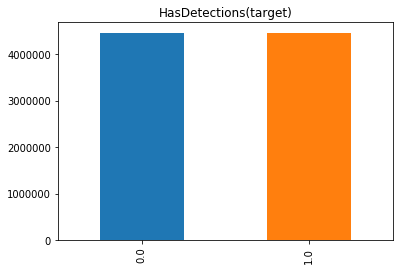

In [19]:
pd_train['HasDetections'].value_counts().plot.bar()
plt.title('HasDetections(target)')

In [20]:
(pd_train['HasDetections'] == 0).value_counts()

True     4462591
False    4458892
Name: HasDetections, dtype: int64

均衡データである。
HasDetectionsの意味的に1がmalwareが見つかったケースだと思う

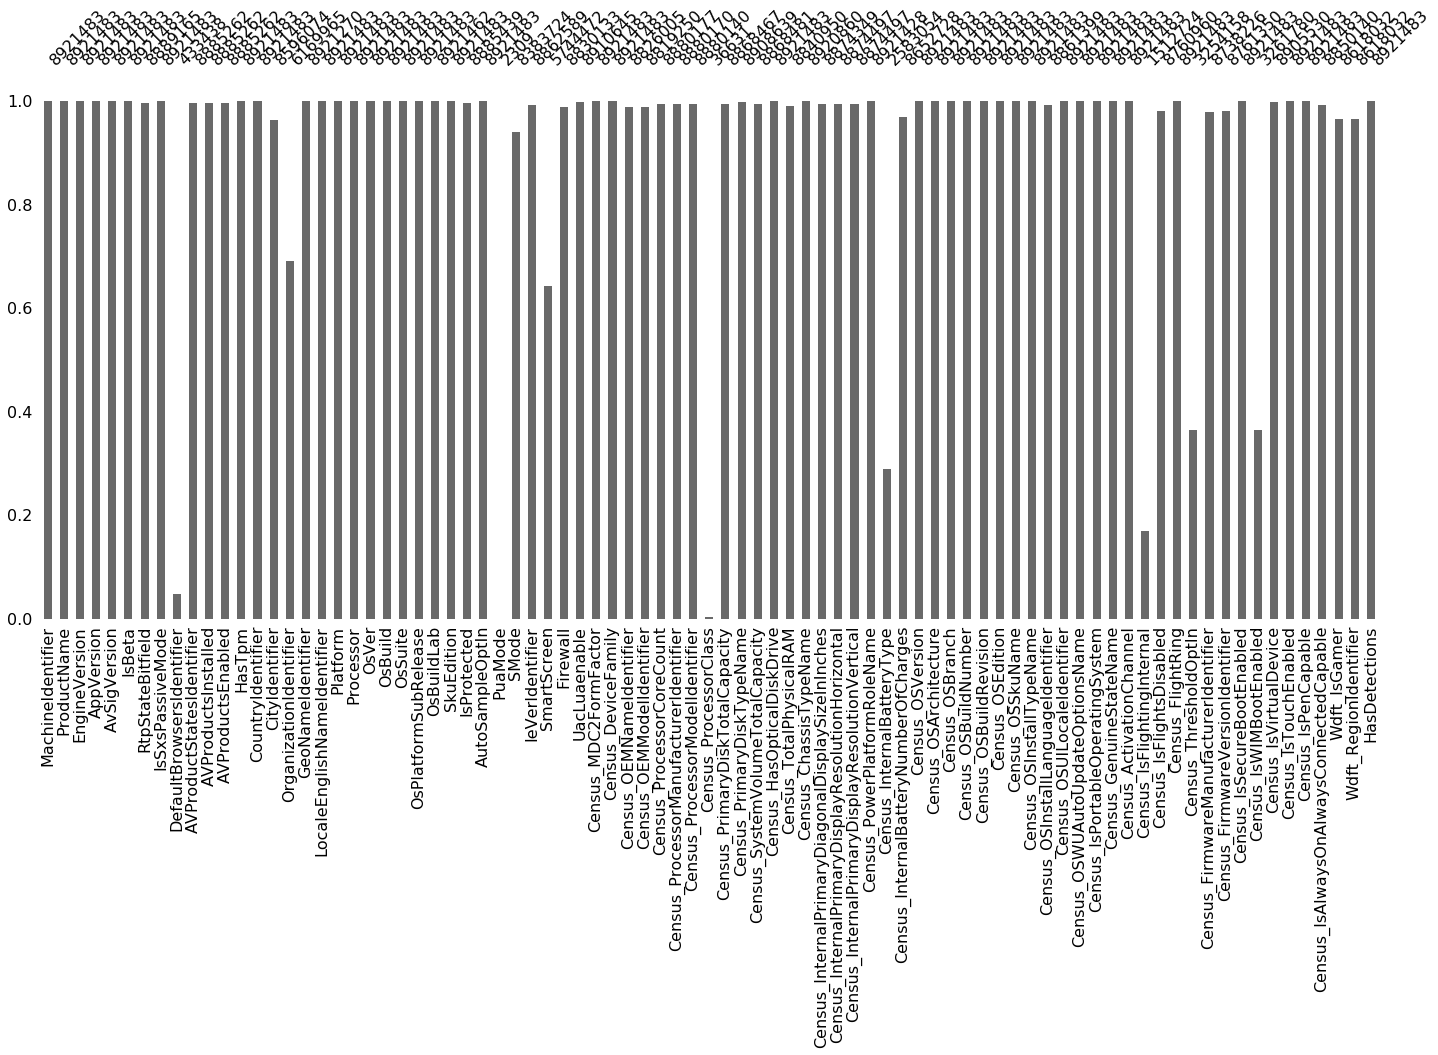

In [21]:
import missingno as msno
msno.bar(pd_train)

In [22]:
#欠損値が多い特徴量を抽出
PICKUP_CRITERIA_FOR_MISSING_DATA = 40 #[%] 欠損率が40%以上のデータ列を抽出
total = len(pd_train)
col_name = pd_train.columns
missing_data_rate = [100 * pd_train[col_name[i]].isnull().sum() / total for i in range(0, len(col_name))]

col_name_nan = np.array([col_name[i] if PICKUP_CRITERIA_FOR_MISSING_DATA < missing_data_rate[i] else None for i in range(0, len(col_name))])
col_name_nan = col_name_nan[col_name_nan != None]

In [23]:
#40%以上欠損値を含んでいる特徴量
col_name_nan

array(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass',
       'Census_InternalBatteryType', 'Census_IsFlightingInternal',
       'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled'], dtype=object)

###### EDA

1. どういうPCが感染しやすいか？  
2. 特徴量について調べる  
3. ざっくり検証  

###### 1.どういうPCが感染しやすいか考える (データセットから検証できるできないに関わらず例を挙げる)

1. OS  
    ・新しい方がセキュリティが強化されている？　逆に古すぎるものはMalwareが対応していない？  
    ・適切にアップデートされているか？  
    ・OS仕様　Office? サーバー？ F/A?  
2. App  
    ・新しいものはセキュリティホールが修正されているだろう。古いものは危ない  
    ・適切にアップデートされているか？  
    ・PCにAppをたくさんインストールするとそれだけリスクが上がる。  
    ・フリーソフトの有無（フリーソフトはリスクあがる）  
3. HW  
    ・Wireless有無  
    ・HWからもそのPCがどの様に使われているかわかるかも。(Office, Server, Factory)  
4. 使われ方  
    ・ネットへのアクセスが多い　（ローカルで使われているものは感染リスク少ないだろう）  
    ・USBメモリなど外付けデバイスの使用が多い   
    ・Office? Factory? Personal? (工場で使われているPCは外部から切り離されている場合が多いのでリスク少ない)  

######  2.特徴量について調べる   

・Kernelを探しみる  
https://www.kaggle.com/youhanlee/my-eda-i-want-to-see-all
1. The meaning of 'Census_ProcessorClassr' is 'Number of logical cores in the processor'.  
2. DefaultBrowsersIdentifier means ' ID for the machine's default browser'. ==> どのブラウザ
3. almost value of 'Census_IsFlightingInternal' is 0.0. Just remove. ==> 特徴なし
4. These days, most batteries are lithum-ion battery. group them into lithum-batter group and non0-lithum-battery group ==> バッテリータイプに特徴がない。ほとんど同じ
5. SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting.  
6. Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has : PCケース
7. HasTPM : TPM=セキュリティーチップ (OS, Appの改竄、データの暗号化などを行う。)最近のPCではわりと当たり前らしい
8. SMode : Windows 10の場合S mode = MicroSoft Appのみインストールできる　（個人というより組織で使われることが多い）
9. Firewall
10. Census_ProcessorCoreCount : 個人PC、サーバー、ファクトリーを見分けられそう
11. Census_PrimaryDiskTotalCapacity : 人PC、サーバー、ファクトリーを見分けられそう
12. Census_SystemVolumeTotalCapacity : 個人PC、サーバー、ファクトリーを見分けられそう
13. Census_TotalPhysicalRAM : 個人PC、サーバー、ファクトリーを見分けられそう
14. Census_IsPortableOperatingSystem : 起動ディスクがUSB どこでも自分のWIndowsを起動できる。（リスク高い？）
15. Census_IsTouchEnabled & Census_IsPenCapable:　PCのタイプを特定できるかも
16. Wdft_IsGamer : Gamer deviceかどうか？（ゲーマーオンライアクセス多い）
17. OrganizationIdentifier
18. AVProductsInstalled
19. AVProductsEnabled
20. AVProductStatesIdentifier
21. IsProtected

使えそうな特徴量をピックアップ

1. OS  
    ・新しい方がセキュリティが強化されている？　逆に古すぎるものはMalwareが対応していない？ => "OSver"   
    ・バグ、リリースバージョンごとに何か違いがあるかも？ => Census_OSVersion,Census_OSBuildNumber, Census_OSBuildRevision,   
    ・適切にアップデートされているか？  => Census_OSWUAutoUpdateOptionsName  
    ・OS仕様　Office? サーバー？ F/A? => Census_DeviceFamily, Census_OSArchitecture, プロセッサ、メモリサイズ、主記憶サイズから予測  
2. App    
    ・新しいものはセキュリティホールが修正されているだろう。古いものは危ない  => AppVer  
    ・適切にアップデートされているか？    
    ・PCにAppをたくさんインストールするとそれだけリスクが上がる。=> SMode  
    ・フリーソフトの有無（フリーソフトはリスクあがる）  => SMode, Census_IsSecureBootEnabled(適切に終了しない場合セキュアモードで立ち上がる。適当な使い方しているとクラッシュ多発)  
3. HW   
    ・Wireless有無  =>   
    ・HWからもそのPCがどの様に使われているかわかるかも。(Office, Server, Factory)    
    ・TPM 有無 => IsTPM  
    ・外部I/F の有無 => Census_HasOpticalDiskDrive  
4. 使われ方    
    ・ネットへのアクセスが多い => Gamer, Census_IsPortableOperatingSystem  
    ・USBメモリなど外付けデバイスの使用が多い => ポータブルな場合感染リスク高そう Census_IsTouchEnabled、Census_IsPenCapable,Census_IsPortableOperatingSystem   
    ・Office? Factory? Personal? (工場で使われているPCは外部から切り離されている場合が多いのでリスク少ない) => Census_PowerPlatformRoleName パワーマネージメントから使われ方を予測, Census_ActivationChannel:大量購入かどうか   

###### 3.仮説

1. OS :OSのバージョン特有の脆弱性、バグの有無により感染リスクに違いがある(古いOSはセキュリティホールが残っている) 一方で古すぎるものはMalwareが互換性がないため感染しにくい。
2. App : AppVerによる違い(OSと同様)
4. HW : TPM(セキュリティーチップ)が効果的である
5. HW : 外部I/Fの有無（CD/DVD/USB）感染経路になり得るため無いに越したことはない
6. Usage : Anti Virous soft、firwallが効果的 
3. Usage : 適当にAppを入れているとそれだけ感染率が高まる（ダウンロードの際に紛れ込む、Appのセキュリティーホールを利用される）
6. Usage : ネットへのアクセスが多いとリスク増える
7. Usage : 持ち歩けるものは外部の機器と接触の機会が増えるため感染リスクが高まる(Raptop, portable)

###### 4.検証１　OSのバージョン特有の脆弱性、バグの有無により感染リスクに違いがある

In [24]:
#"OSver","Census_OSVersion","Census_OSBuildNumber","Census_OSBuildRevision","Census_OSWUAutoUpdateOptionsName","Census_DeviceFamily","Census_OSArchitectureを抽出
col_name_os_related = [
    'Census_OSVersion',
    'Census_OSBuildNumber',
    'Census_OSBuildRevision',
    'Census_OSWUAutoUpdateOptionsName',
    'Census_DeviceFamily',
    'Census_OSArchitecture',
    'HasDetections',
]

In [25]:
pd_train[col_name_os_related].head()

,Census_OSVersion,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSWUAutoUpdateOptionsName,Census_DeviceFamily,Census_OSArchitecture,HasDetections
0,10.0.17134.165,17134,165,UNKNOWN,Windows.Desktop,amd64,0.0
1,10.0.17134.1,17134,1,UNKNOWN,Windows.Desktop,amd64,0.0
2,10.0.17134.165,17134,165,FullAuto,Windows.Desktop,amd64,0.0
3,10.0.17134.228,17134,228,FullAuto,Windows.Desktop,amd64,1.0
4,10.0.17134.191,17134,191,FullAuto,Windows.Desktop,amd64,1.0


In [26]:
label_name = np.unique(pd_train[col_name_os_related[3]])

In [27]:
#OS versionを大まかなくくりに分ける

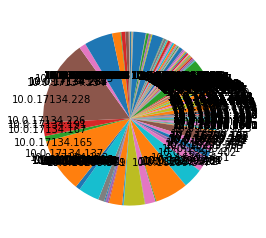

In [28]:
plot_data_as_pie_chart(pd_train[col_name_os_related], col_name_os_related[0])

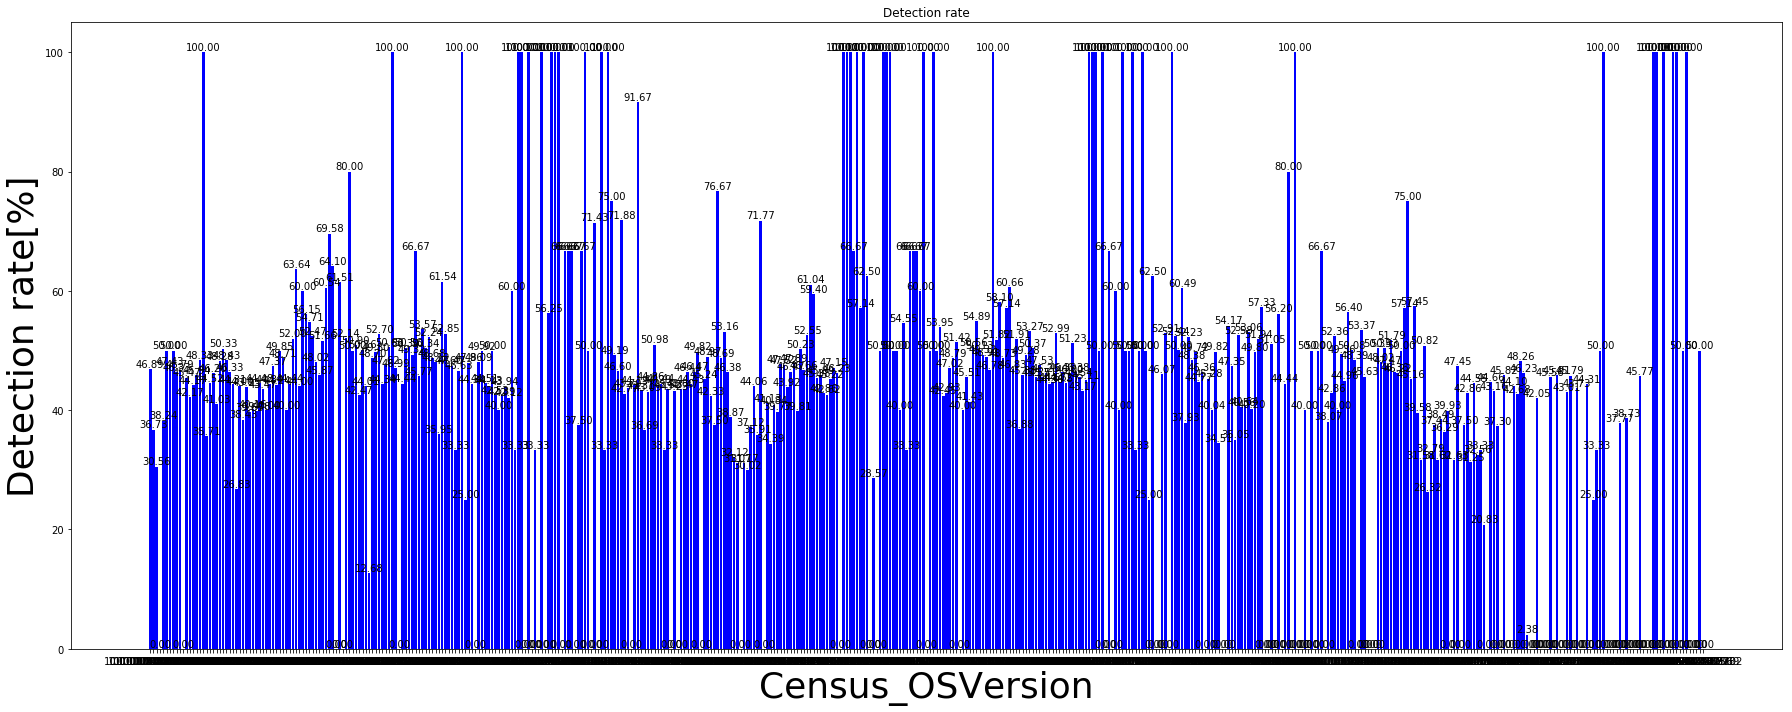

In [29]:
plot_detection_rate(pd_train[col_name_os_related], col_name_os_related[0], flag_rename_x_label=True)

In [30]:
label_name = np.unique(pd_train[col_name_os_related[0]])

In [31]:
print(label_name)

['10.0.10240.16384' '10.0.10240.16387' '10.0.10240.16389'
 '10.0.10240.16391' '10.0.10240.16393' '10.0.10240.16394'
 '10.0.10240.16397' '10.0.10240.16399' '10.0.10240.16405'
 '10.0.10240.16413' '10.0.10240.16425' '10.0.10240.16430'
 '10.0.10240.16433' '10.0.10240.16445' '10.0.10240.16463'
 '10.0.10240.16487' '10.0.10240.16498' '10.0.10240.16500'
 '10.0.10240.16520' '10.0.10240.16549' '10.0.10240.16566'
 '10.0.10240.16590' '10.0.10240.16601' '10.0.10240.16644'
 '10.0.10240.16683' '10.0.10240.16725' '10.0.10240.16732'
 '10.0.10240.16771' '10.0.10240.16854' '10.0.10240.16942'
 '10.0.10240.17024' '10.0.10240.17071' '10.0.10240.17113'
 '10.0.10240.17146' '10.0.10240.17190' '10.0.10240.17202'
 '10.0.10240.17236' '10.0.10240.17319' '10.0.10240.17354'
 '10.0.10240.17394' '10.0.10240.17443' '10.0.10240.17446'
 '10.0.10240.17488' '10.0.10240.17533' '10.0.10240.17609'
 '10.0.10240.17643' '10.0.10240.17673' '10.0.10240.17709'
 '10.0.10240.17738' '10.0.10240.17770' '10.0.10240.17797'
 '10.0.10240.1

In [32]:
col_name_os_ver_related = [
    'Census_OSVersion',
    'HasDetections',
]

In [33]:
pd_train_os_ver = pd_train[col_name_os_ver_related]
pd_train_os_ver["OS_VER_ID"] = 0

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
for i in range(20):
    ver = "10.0." + "{}".format(i)
    pd_train_os_ver["OS_VER_ID"][pd_train_os_ver["Census_OSVersion"].str.contains(ver)] = ver

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.p

In [35]:
for i in range(3):
    ver = "6." + "{}".format(i)
    pd_train_os_ver["OS_VER_ID"][pd_train_os_ver["Census_OSVersion"].str.contains(ver)] = ver

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


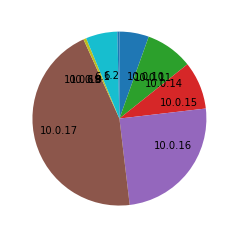

In [36]:
plot_data_as_pie_chart(pd_train_os_ver, "OS_VER_ID")

In [37]:
pd_train_os_ver.head()

,Census_OSVersion,HasDetections,OS_VER_ID
0,10.0.17134.165,0.0,10.0.17
1,10.0.17134.1,0.0,10.0.17
2,10.0.17134.165,0.0,10.0.17
3,10.0.17134.228,1.0,10.0.17
4,10.0.17134.191,1.0,10.0.17


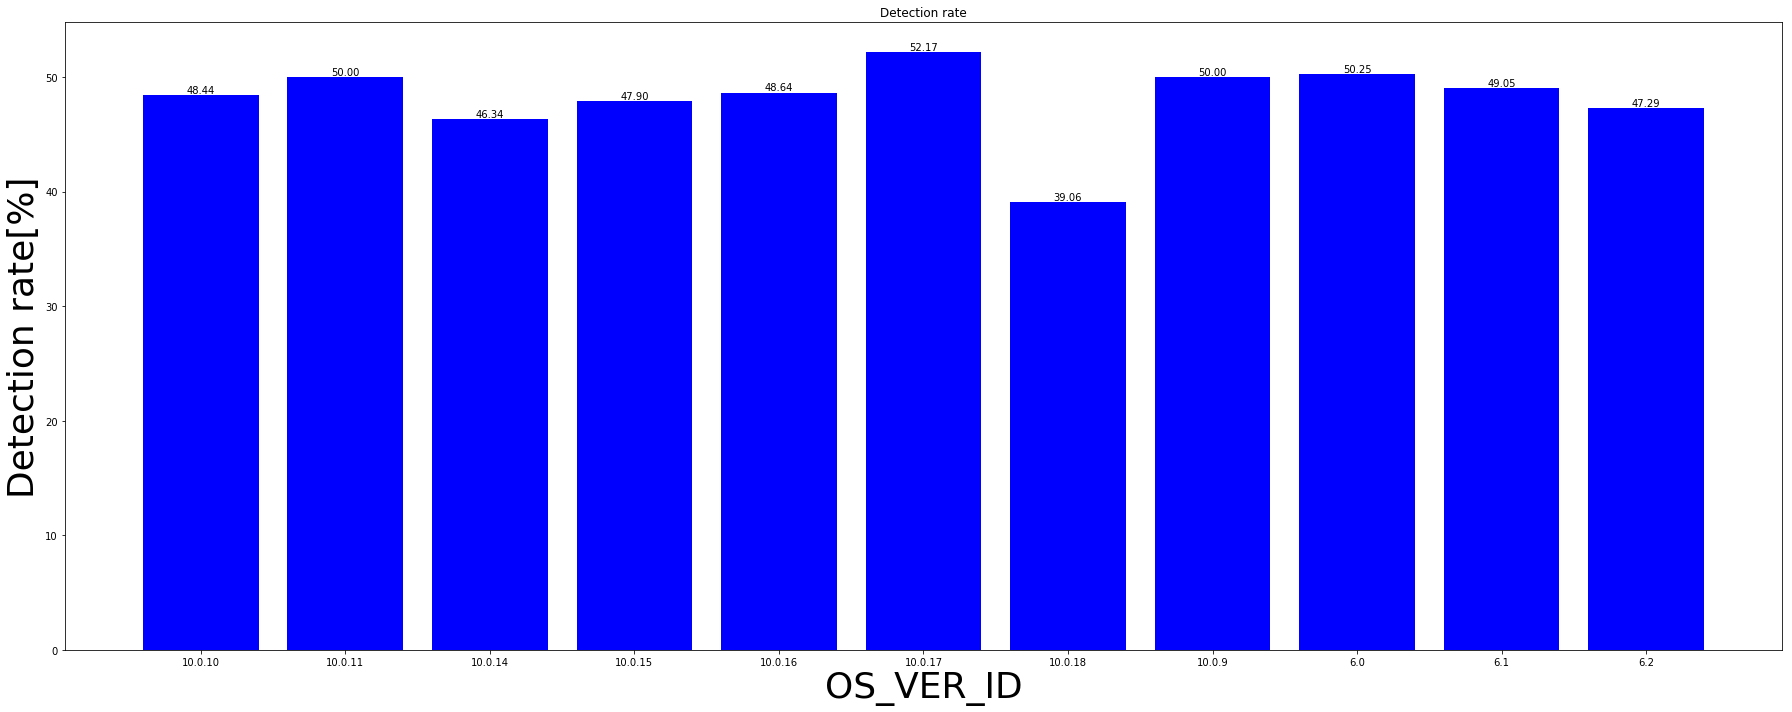

In [38]:
plot_detection_rate(pd_train_os_ver, "OS_VER_ID", flag_rename_x_label=True)

#### 10.0.10 ~ 10.0.17 & 6.2が主流。Versionが新しければ良いというわけではなさそう。OSのソフト的な原因である可能性は低い。

In [39]:
#OS BuildNUmber

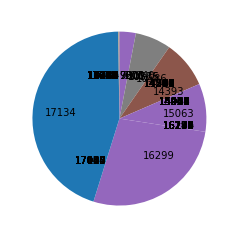

In [40]:
plot_data_as_pie_chart(pd_train[col_name_os_related], col_name_os_related[1])

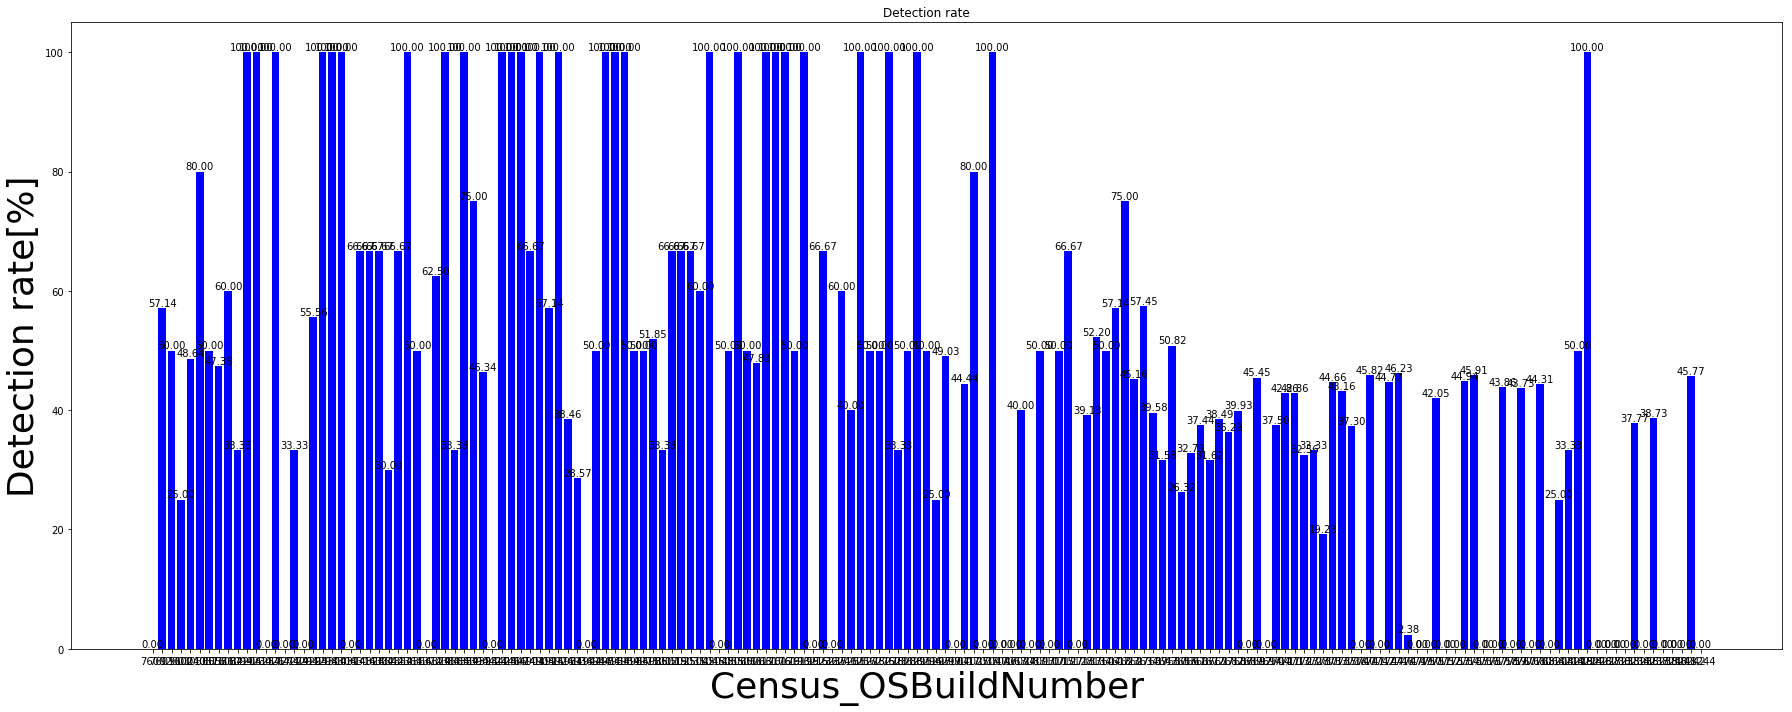

In [41]:
plot_detection_rate(pd_train[col_name_os_related], col_name_os_related[1], flag_rename_x_label=True)
label_name = np.unique(pd_train[col_name_os_related[1]])

In [42]:
print(label_name)

[ 7600  7601  9200  9600 10240 10565 10576 10586 11082 11099 14206 14230
 14257 14267 14271 14279 14291 14295 14298 14300 14306 14314 14316 14328
 14332 14342 14352 14361 14366 14372 14379 14383 14385 14389 14390 14393
 14421 14425 14466 14474 14901 14905 14915 14926 14931 14936 14942 14946
 14951 14955 14959 14965 14971 14986 15002 15019 15025 15031 15042 15046
 15048 15055 15060 15061 15063 16170 16176 16179 16193 16199 16215 16232
 16237 16241 16251 16257 16273 16275 16278 16281 16288 16291 16294 16296
 16299 17004 17017 17025 17035 17040 17046 17063 17074 17083 17093 17107
 17115 17127 17128 17133 17134 17604 17618 17623 17627 17634 17639 17643
 17650 17655 17661 17666 17672 17677 17682 17686 17689 17692 17694 17704
 17711 17713 17723 17728 17730 17733 17735 17738 17740 17741 17742 17744
 17746 17747 17749 17750 17751 17752 17753 17754 17755 17756 17757 17758
 17759 17760 17761 17763 18064 18204 18214 18219 18224 18226 18227 18230
 18233 18234 18236 18237 18238 18240 18241 18242 18

In [43]:
col_name_buildnumber = [
    'Census_OSBuildNumber',
    'HasDetections',
]

In [44]:
pd_train_build_num = pd_train[col_name_buildnumber]
pd_train_build_num["OS_BUILD_NUM"] = 0

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
for i in range(7, 18):
    ver = "{}".format(i)
    pd_train_build_num["Census_OSBuildNumber"] = pd_train_build_num["Census_OSBuildNumber"].astype('str')
    pd_train_build_num["OS_BUILD_NUM"][pd_train_build_num["Census_OSBuildNumber"].str.startswith(ver)] = ver

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [46]:
pd_train_build_num["OS_BUILD_NUM"] = pd_train_build_num["OS_BUILD_NUM"].astype('str')

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


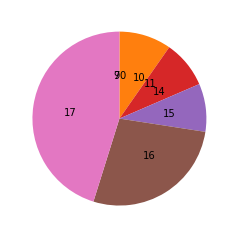

In [47]:
plot_data_as_pie_chart(pd_train_build_num, "OS_BUILD_NUM")

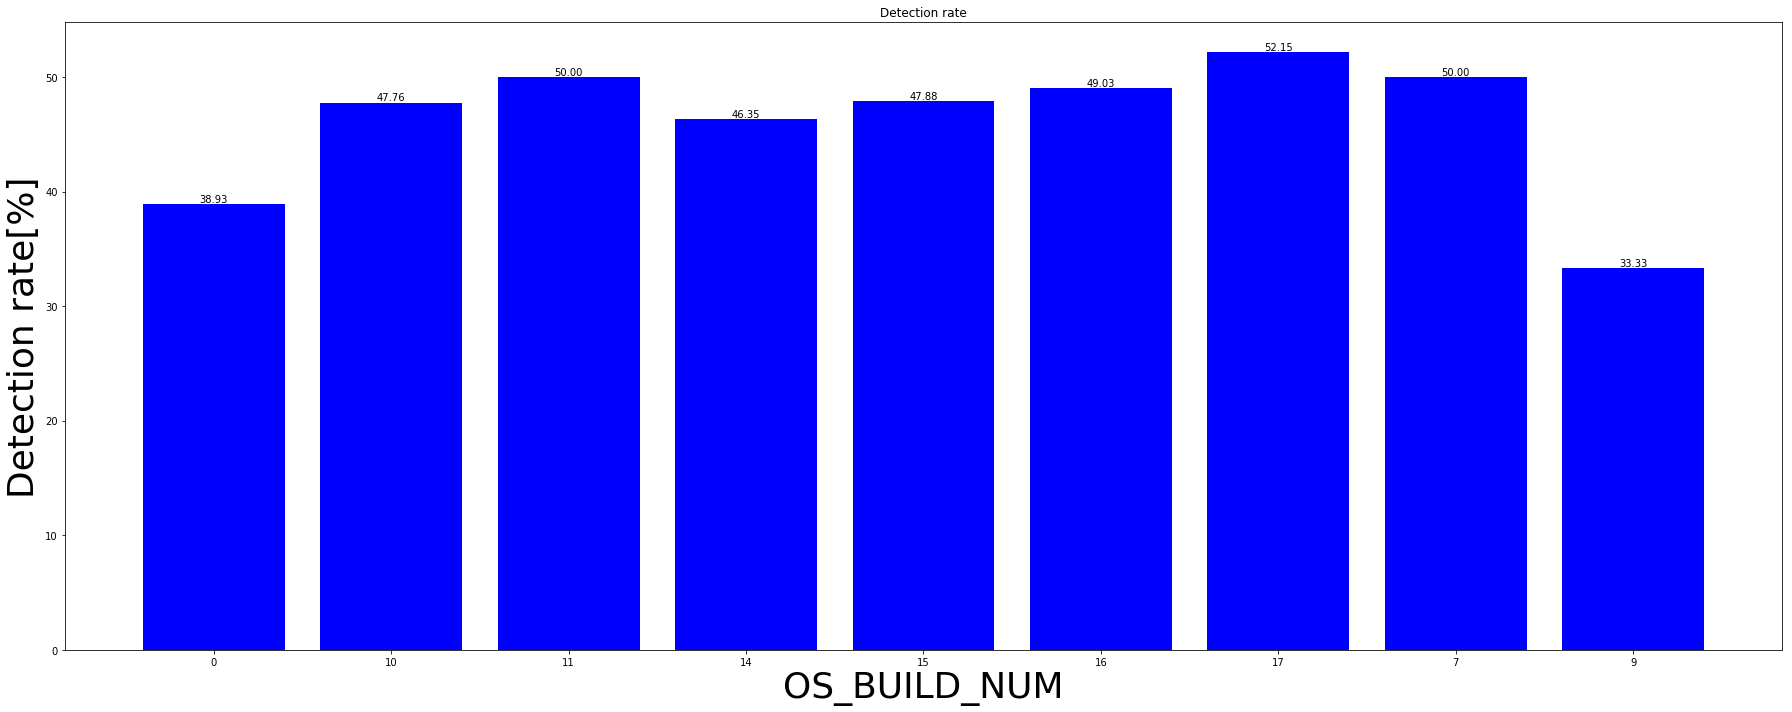

In [48]:
plot_detection_rate(pd_train_build_num, "OS_BUILD_NUM", flag_rename_x_label=True)

最新Buildで若干多く見えるが。。。

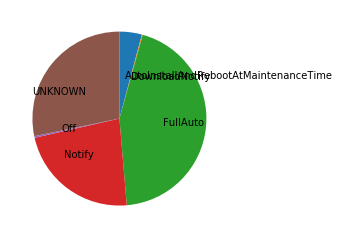

In [49]:
#AutoUpdateOptionについて
plot_data_as_pie_chart(pd_train[col_name_os_related], col_name_os_related[3])

In [50]:
#offのデータ数
(pd_train[col_name_os_related[3]] == "Off").sum()

26961

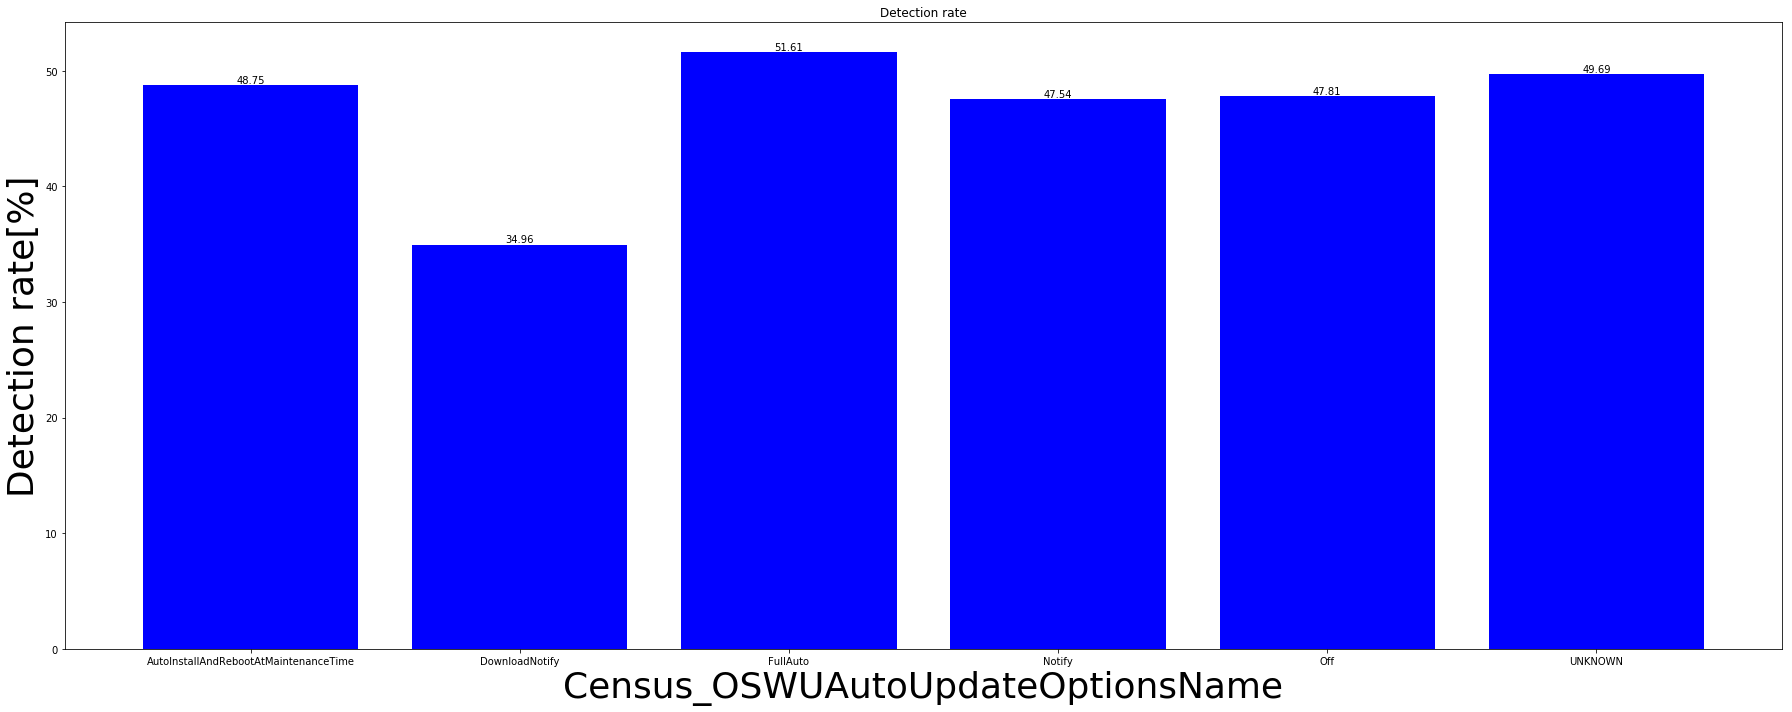

In [51]:
plot_detection_rate(pd_train[col_name_os_related], col_name_os_related[3], flag_rename_x_label=True)

In [52]:
print(label_name)

[ 7600  7601  9200  9600 10240 10565 10576 10586 11082 11099 14206 14230
 14257 14267 14271 14279 14291 14295 14298 14300 14306 14314 14316 14328
 14332 14342 14352 14361 14366 14372 14379 14383 14385 14389 14390 14393
 14421 14425 14466 14474 14901 14905 14915 14926 14931 14936 14942 14946
 14951 14955 14959 14965 14971 14986 15002 15019 15025 15031 15042 15046
 15048 15055 15060 15061 15063 16170 16176 16179 16193 16199 16215 16232
 16237 16241 16251 16257 16273 16275 16278 16281 16288 16291 16294 16296
 16299 17004 17017 17025 17035 17040 17046 17063 17074 17083 17093 17107
 17115 17127 17128 17133 17134 17604 17618 17623 17627 17634 17639 17643
 17650 17655 17661 17666 17672 17677 17682 17686 17689 17692 17694 17704
 17711 17713 17723 17728 17730 17733 17735 17738 17740 17741 17742 17744
 17746 17747 17749 17750 17751 17752 17753 17754 17755 17756 17757 17758
 17759 17760 17761 17763 18064 18204 18214 18219 18224 18226 18227 18230
 18233 18234 18236 18237 18238 18240 18241 18242 18

アップデートの大部分はFullAuto, Notify, UNKNOWNの３つで締めれている。この３つの間で感染率に大きな違いはなかった。
若干Notifyの方が低い(PC素人はAutoにするだろう。そういう人は知識がないため感染リスクが高い？)

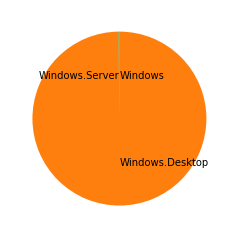

In [53]:
#Device Famillyについて
plot_data_as_pie_chart(pd_train[col_name_os_related], col_name_os_related[4])

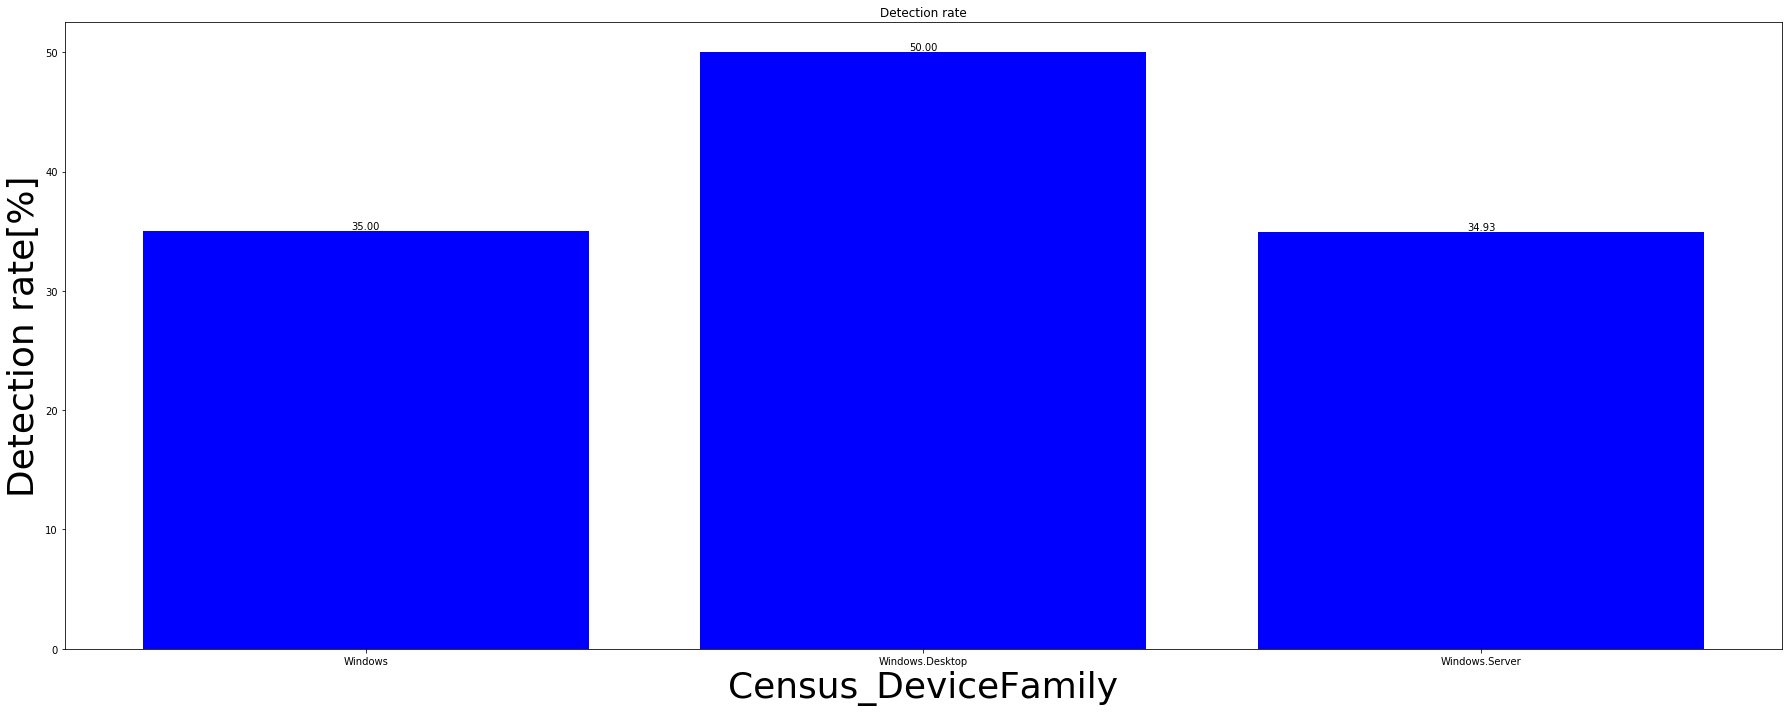

In [54]:
label_name = np.unique(pd_train[col_name_os_related[4]])
plot_detection_rate(pd_train[col_name_os_related], col_name_os_related[4], flag_rename_x_label=True)

In [55]:
print(label_name)

['Windows' 'Windows.Desktop' 'Windows.Server']


データは99%以上Windows Desktopに属する。予測のために有効なデータにはならない

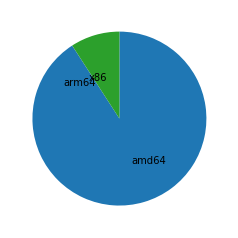

In [56]:
#Census_OSArchitectureについて
plot_data_as_pie_chart(pd_train[col_name_os_related], col_name_os_related[5])

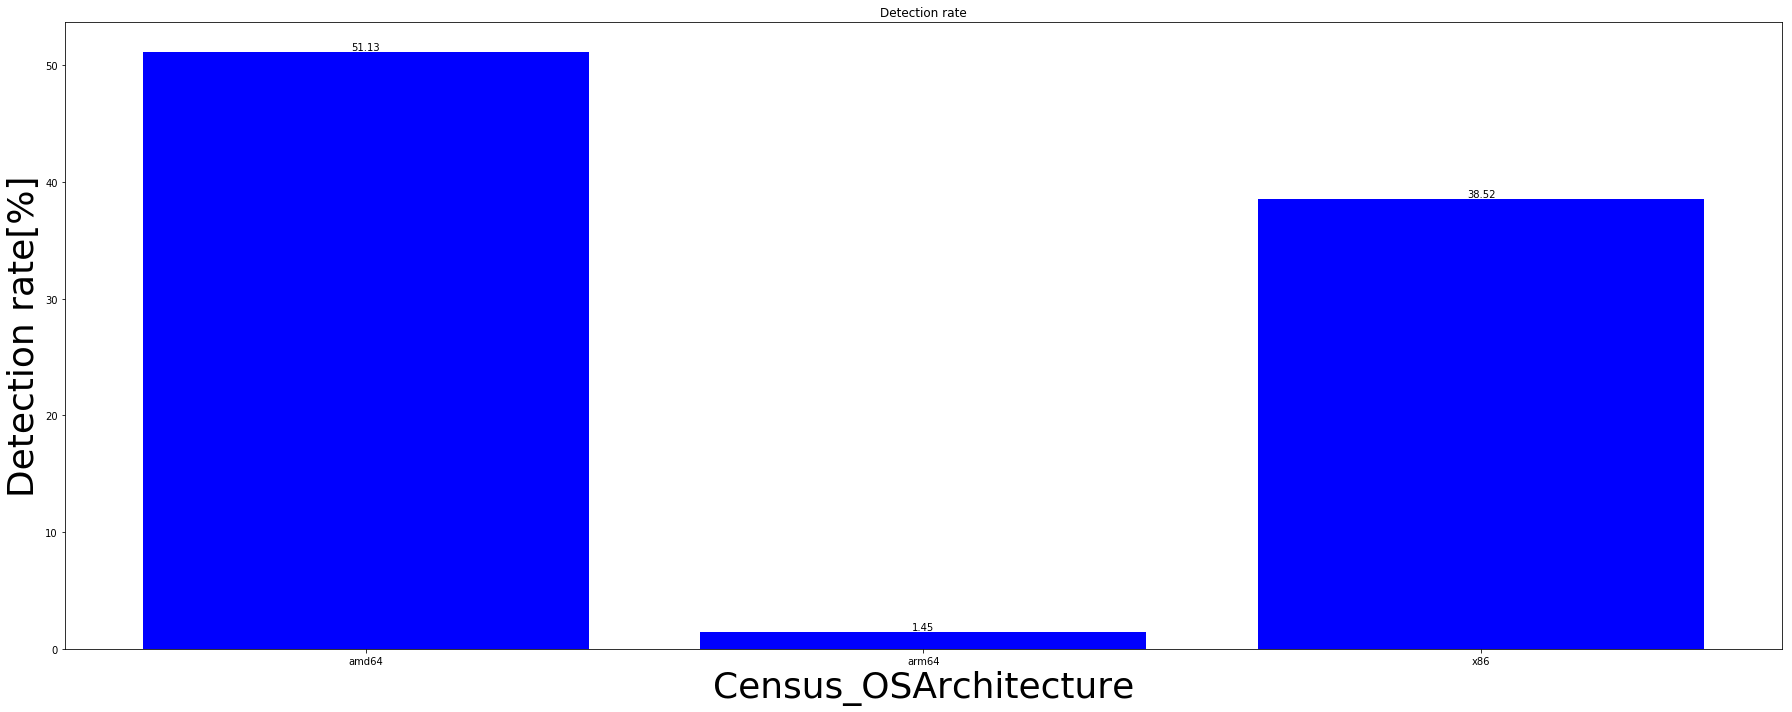

In [57]:
label_name = np.unique(pd_train[col_name_os_related[5]])
plot_detection_rate(pd_train[col_name_os_related], col_name_os_related[5], flag_rename_x_label=True)

x86は32bit CPUのアーキテクチャの総称で比較的古いタイプのPCに搭載されているCPUこのタイプである。  
amd64は64bit CPUのアーキテクチャの総称でx86よりも新しい。
10以上前から64bitが主流なためx86が採用されているPCは古くそれに搭載されているOS等も古い。古すぎるプラットフォームに互換性の無いMalwareがあるためamd64とx86で差が現れているのかも

In [58]:
#OsPlatformSubRelease による違い
col_name_OS = [
    'OsPlatformSubRelease',
    'HasDetections',
]

In [59]:
pd_train_OS = pd_train[col_name_OS]

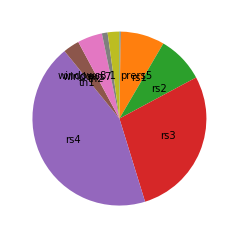

In [60]:
plot_data_as_pie_chart(pd_train_OS, "OsPlatformSubRelease")

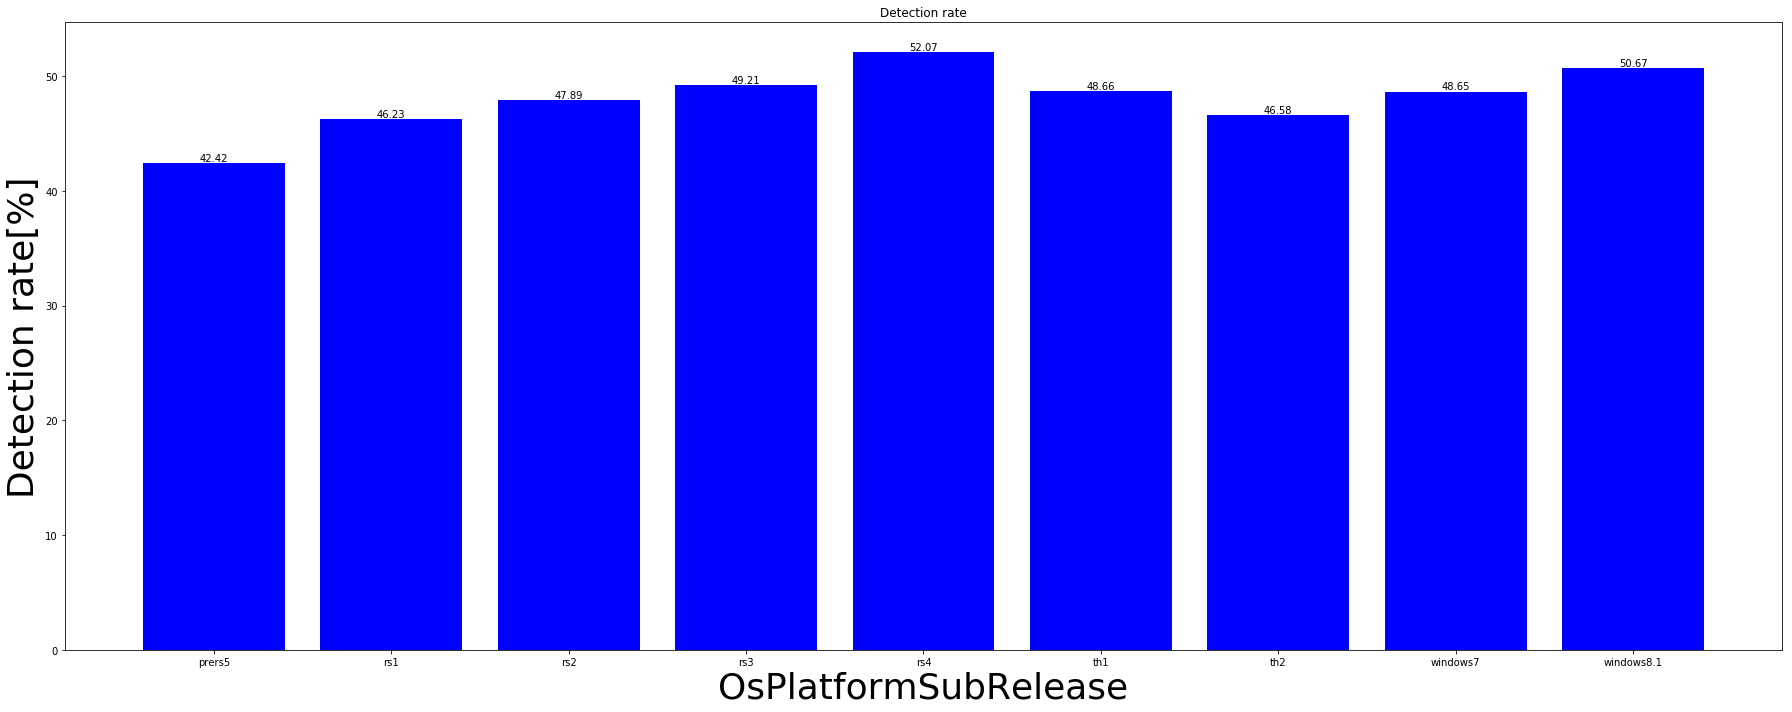

In [61]:
label_name = np.unique(pd_train_OS["OsPlatformSubRelease"])
plot_detection_rate(pd_train_OS, "OsPlatformSubRelease", flag_rename_x_label=True)

In [62]:
print(label_name)

['prers5' 'rs1' 'rs2' 'rs3' 'rs4' 'th1' 'th2' 'windows7' 'windows8.1']


#### rs2~rs4が主流。 rs4の検出率が高い。

###### 4.検証２　Defender Classによる違い

In [63]:
col_name_MSDF_related = [
    'SkuEdition', 
    'HasDetections',
]

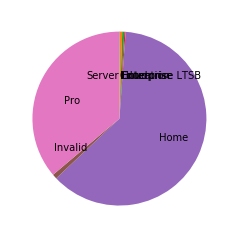

In [64]:
plot_data_as_pie_chart(pd_train[col_name_MSDF_related], col_name_MSDF_related[0])

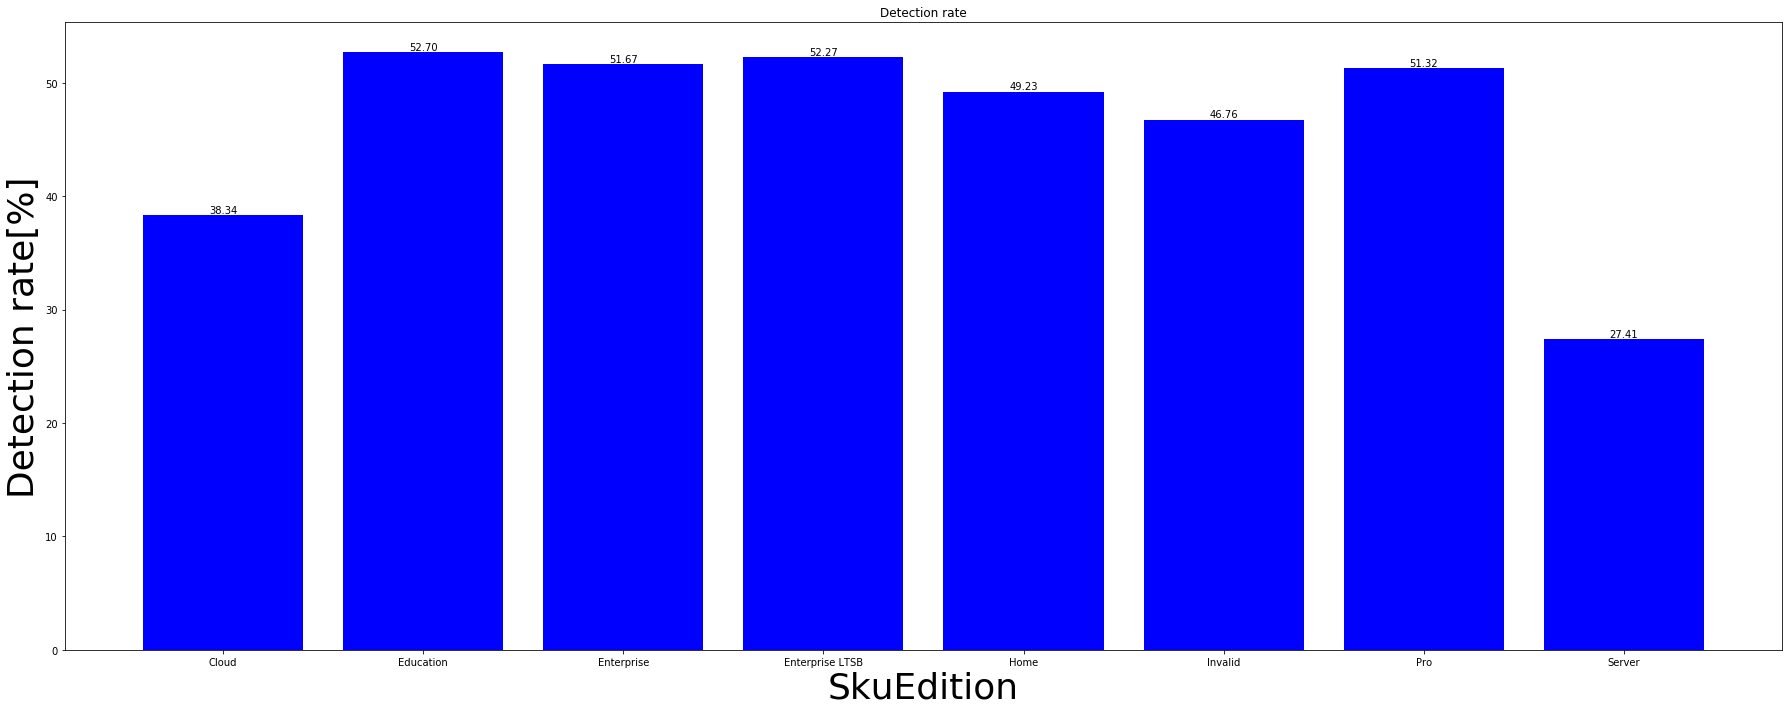

In [65]:
label_name = np.unique(pd_train[col_name_MSDF_related[0]])
plot_detection_rate(pd_train[col_name_MSDF_related], col_name_MSDF_related[0], flag_rename_x_label=True)

Home, Proが主流。この二つを比べると若干Proが高い

###### 4.検証３　TPM(セキュリティーチップ)が効果的である

ほとんどのPCに搭載されているため、特徴量としてはあまり有効でない。

###### 4.検証４　外部I/Fの有無（CD/DVD/USB）感染経路になり得るため無いに越したことはない

In [66]:
col_name_IF_related = [
    'Census_HasOpticalDiskDrive',
    'HasDetections',
]

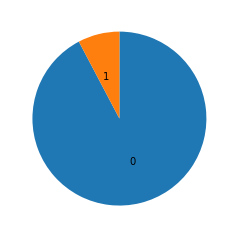

In [67]:
plot_data_as_pie_chart(pd_train[col_name_IF_related], col_name_IF_related[0])

In [68]:
pd_train[col_name_IF_related]

,Census_HasOpticalDiskDrive,HasDetections
0,0,0.0
1,0,0.0
2,0,0.0
3,0,1.0
4,0,1.0
5,0,1.0
6,0,1.0
7,1,0.0
8,0,0.0
9,1,1.0


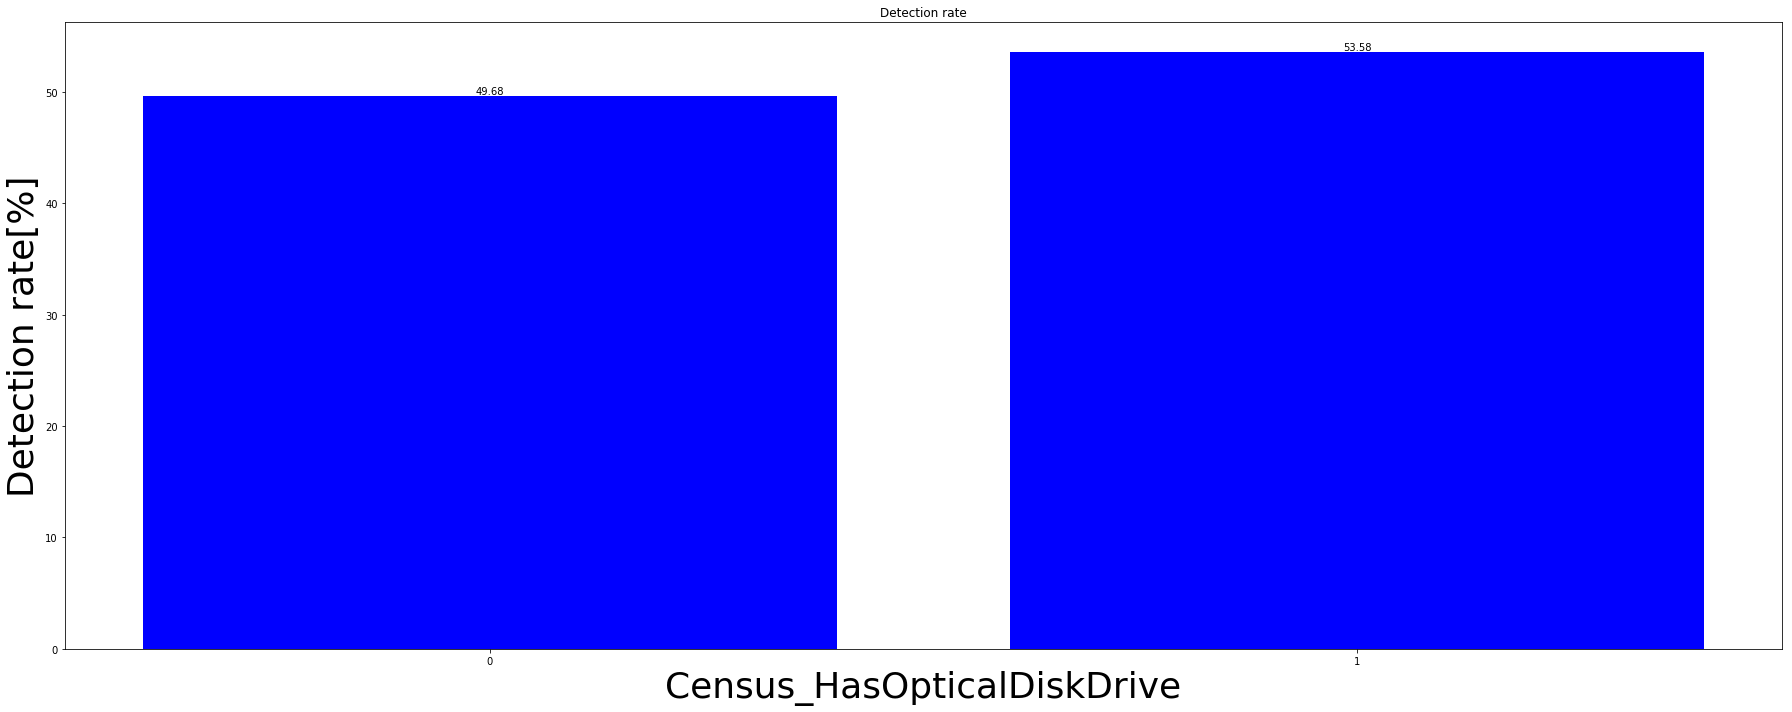

In [69]:
#Census_HasOpticalDiskDrive
label_name = np.unique(pd_train[col_name_IF_related[0]])
plot_detection_rate(pd_train[col_name_IF_related], col_name_IF_related[0], flag_rename_x_label=True)

近年光学ドライブを搭載しているPCは少なく、これ自体が感染経路として主だとは思えないが、光学ドライブの有無で感染率に若干の差が出た。
光学ドライブの有無はPCの新旧を表すだろうか？

###### 4.検証５　適当にAppを入れているとそれだけ感染率が高まる（ダウンロードの際に紛れ込む、Appのセキュリティーホールを利用される）

In [70]:
#SMode, Census_IsSecureBootEnabled
col_name_App_related = [
    'SMode',
    'Census_IsSecureBootEnabled',
    'HasDetections',
]

In [71]:
pd_train_app = pd_train[col_name_App_related].replace(np.nan, -1)

In [72]:
pd_train_app[col_name_App_related].head()

,SMode,Census_IsSecureBootEnabled,HasDetections
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,1.0
4,0.0,0,1.0


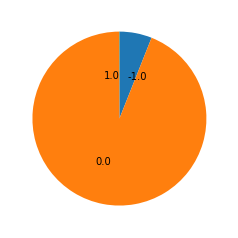

In [73]:
#SMode
plot_data_as_pie_chart(pd_train_app[col_name_App_related], col_name_App_related[0])

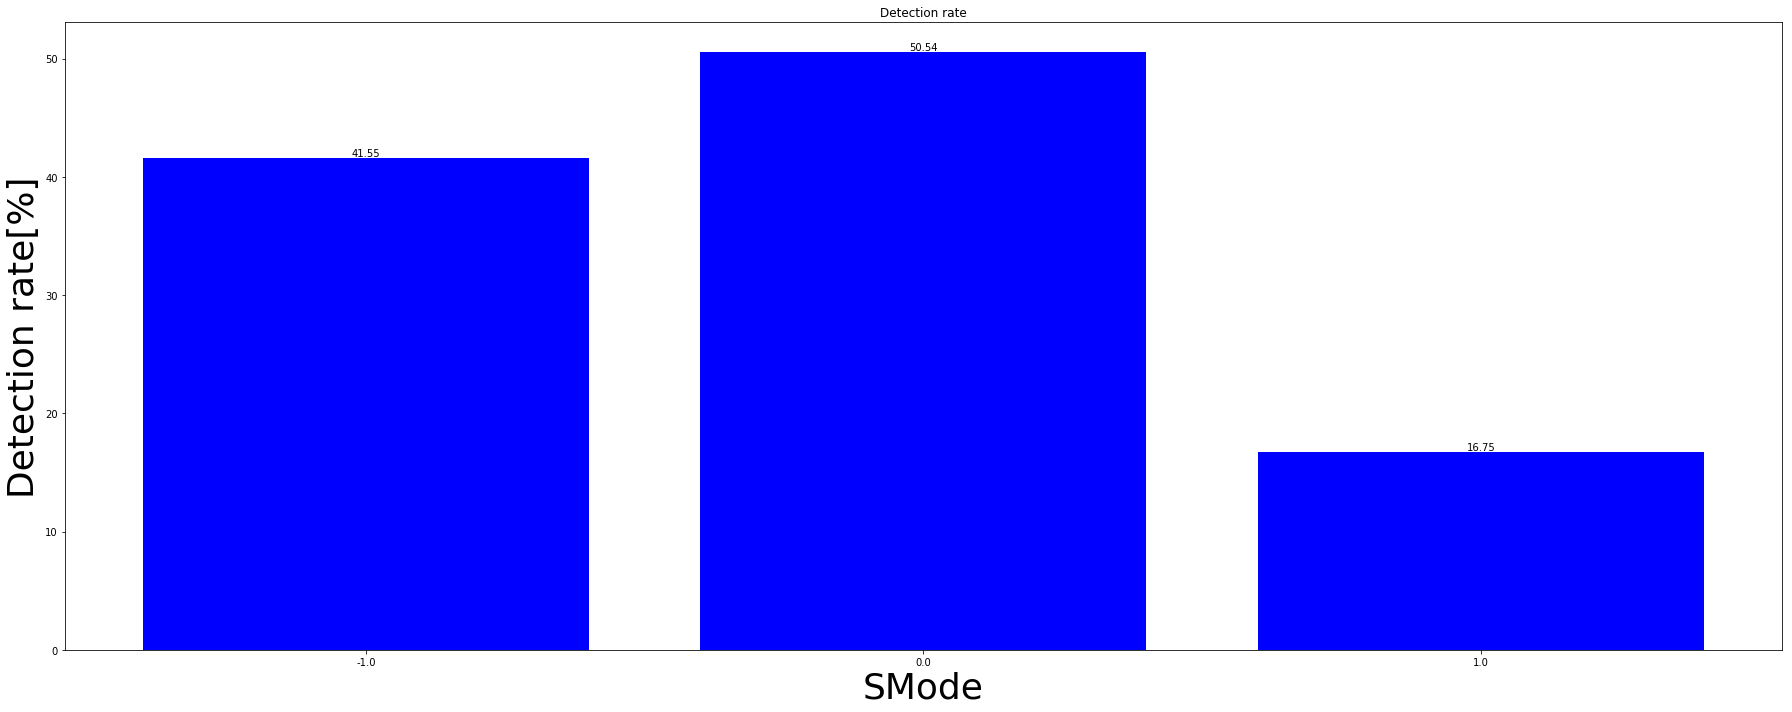

In [74]:
label_name = np.unique(pd_train_app[col_name_App_related[0]])
plot_detection_rate(pd_train_app[col_name_App_related], col_name_App_related[0], flag_rename_x_label=True)

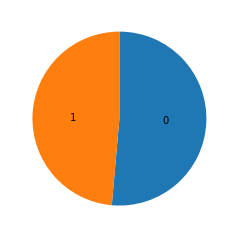

In [75]:
#Census_IsSecureBootEnabled
plot_data_as_pie_chart(pd_train_app[col_name_App_related], col_name_App_related[1])

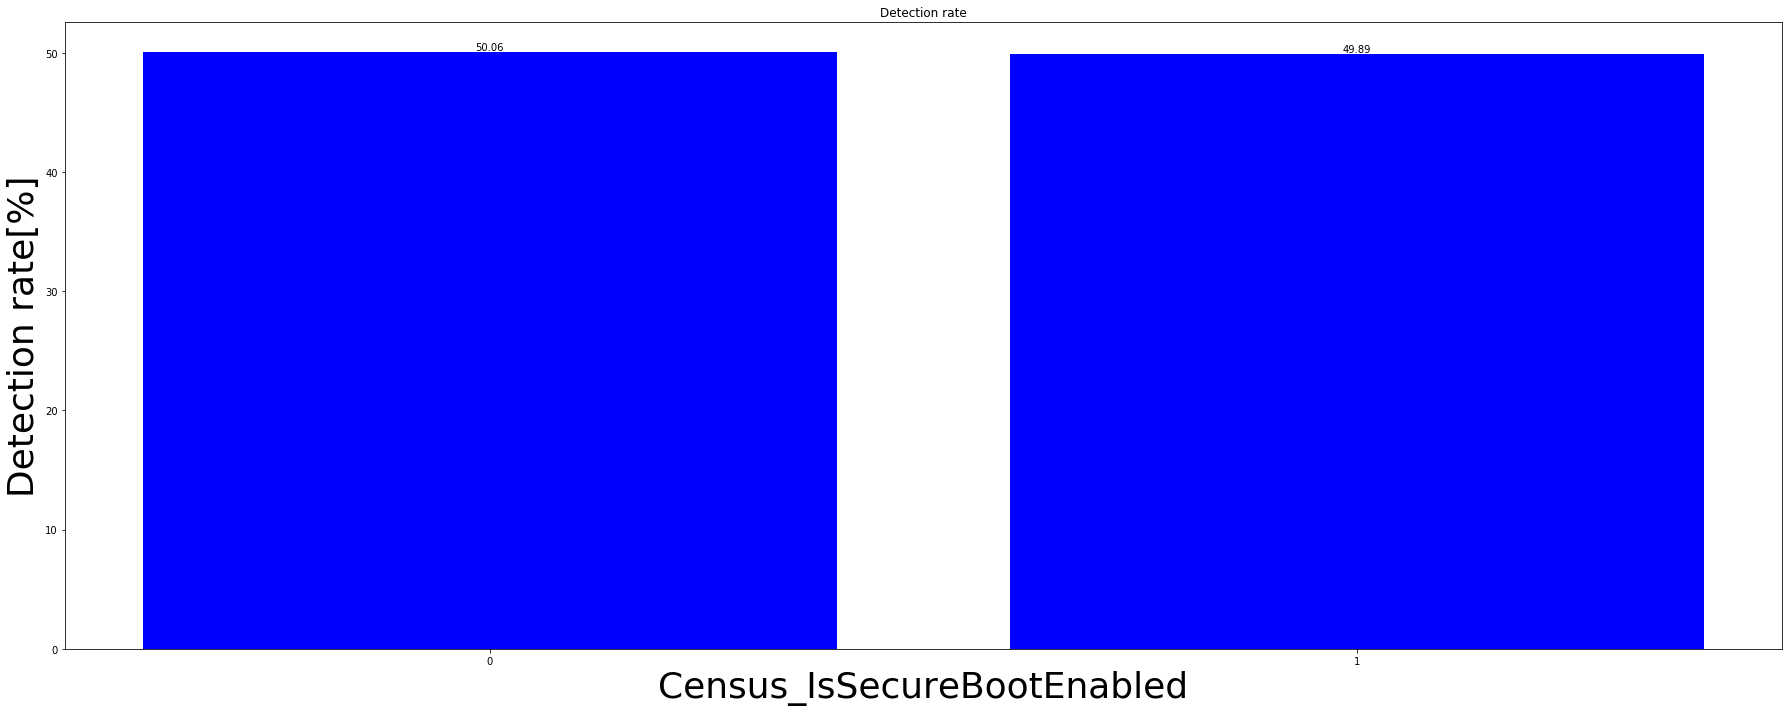

In [76]:
label_name = np.unique(pd_train_app[col_name_App_related[1]])
plot_detection_rate(pd_train_app[col_name_App_related], col_name_App_related[1], flag_rename_x_label=True)

###### 4.検証６　ネットへのアクセスが多いとリスク増える

In [77]:
#Gamer, Census_IsPortableOperatingSystem
col_name_Net_related = [
    'Wdft_IsGamer',
    'Census_IsPortableOperatingSystem',
    'HasDetections',
]

In [78]:
#Wdft_IsGamer
label_name = np.unique(pd_train[col_name_Net_related[0]])

In [79]:
pd_train_net = pd_train[col_name_Net_related].replace(np.nan, -1)

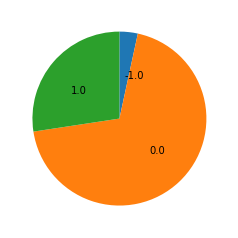

In [80]:
plot_data_as_pie_chart(pd_train_net[col_name_Net_related], col_name_Net_related[0])

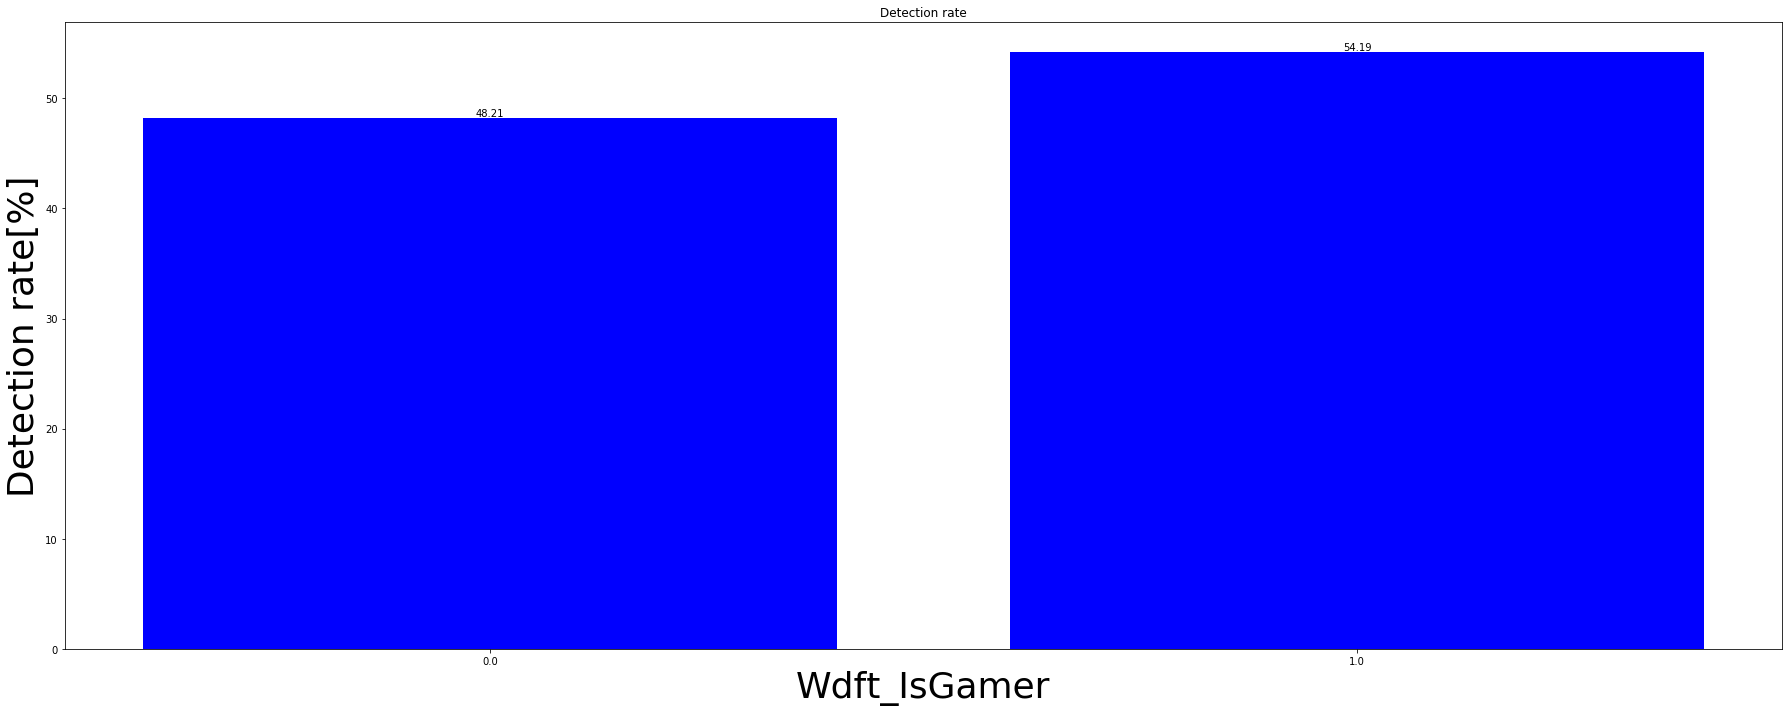

In [81]:
label_name = np.unique(pd_train[col_name_Net_related[0]])
plot_detection_rate(pd_train[col_name_Net_related], col_name_Net_related[0], flag_rename_x_label=True)

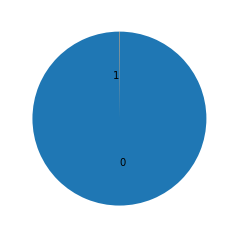

In [82]:
#Census_IsPortableOperatingSystem
plot_data_as_pie_chart(pd_train[col_name_Net_related], col_name_Net_related[1])

##### 0に偏っている。あまり特徴量としては有効出ない

###### 4.検証７　持ち歩けるものは外部の機器と接触の機会が増えるため感染リスクが高まる(Raptop, portable)

###### 4.検証8　適切にAnti Vが入っているか？

AVProductsInstalled
AVProductsEnabled
AVProductStatesIdentifier
IsProtected

In [84]:
col_name_Anti_related = [
    'AVProductsInstalled',
    'AVProductsEnabled',
    'AVProductStatesIdentifier',
    'IsProtected',
    'HasDetections',
]

In [85]:
pd_train_anti = pd_train[col_name_Anti_related].replace(np.nan, -1)

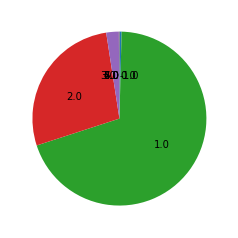

In [86]:
#'AVProductsInstalled'
plot_data_as_pie_chart(pd_train_anti, col_name_Anti_related[0])

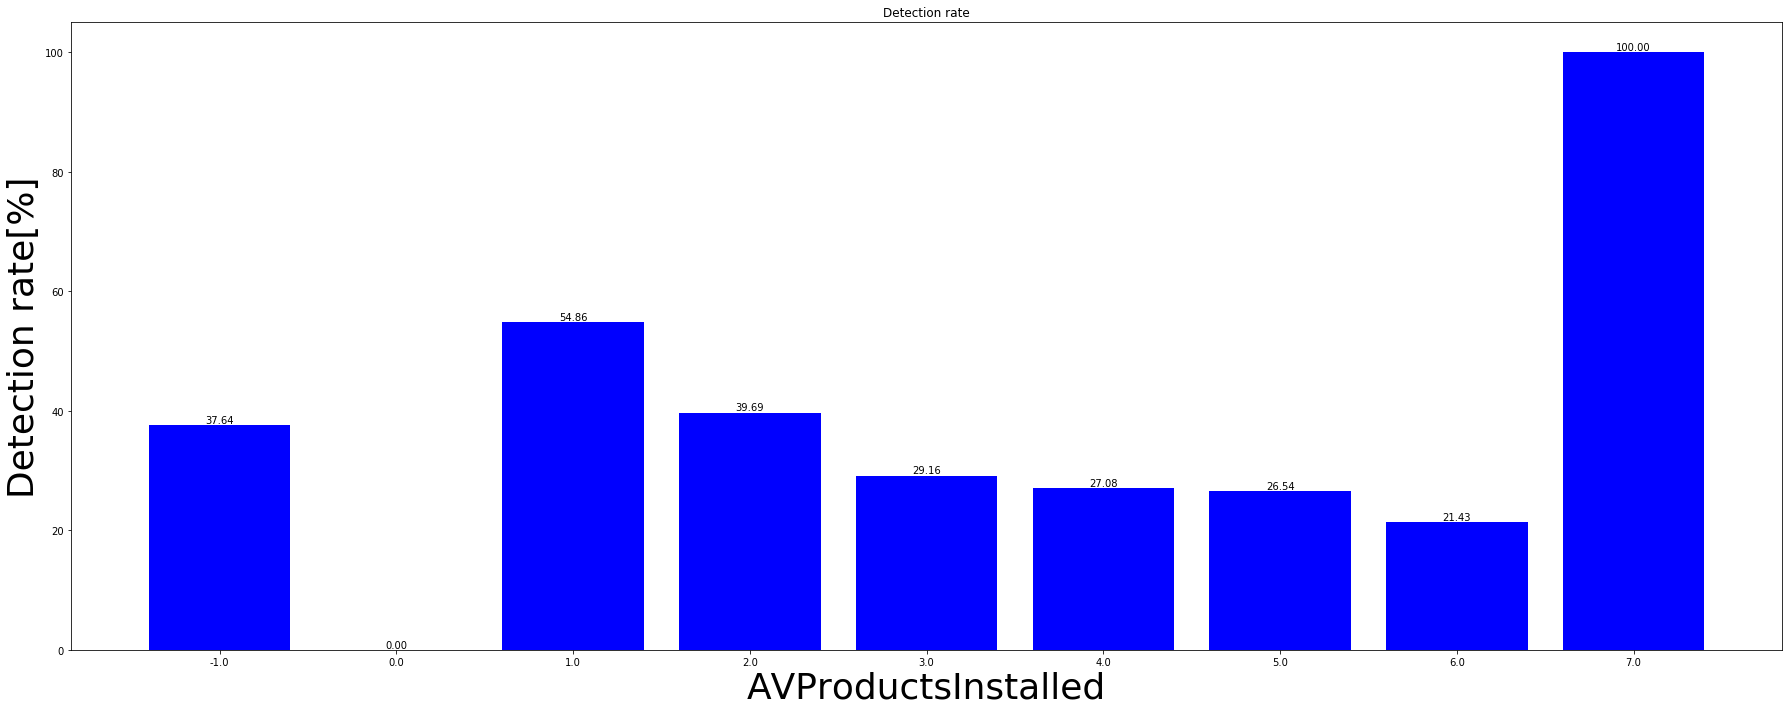

In [87]:
label_name = np.unique(pd_train_anti[col_name_Anti_related[0]])
plot_detection_rate(pd_train_anti, col_name_Anti_related[0], flag_rename_x_label=True)

プロダクトID 1, 2が主流。 2の方が良い

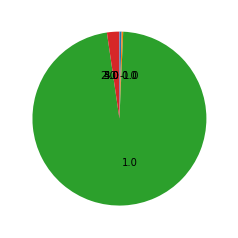

In [88]:
#AVProductsEnabled
plot_data_as_pie_chart(pd_train_anti, col_name_Anti_related[1])

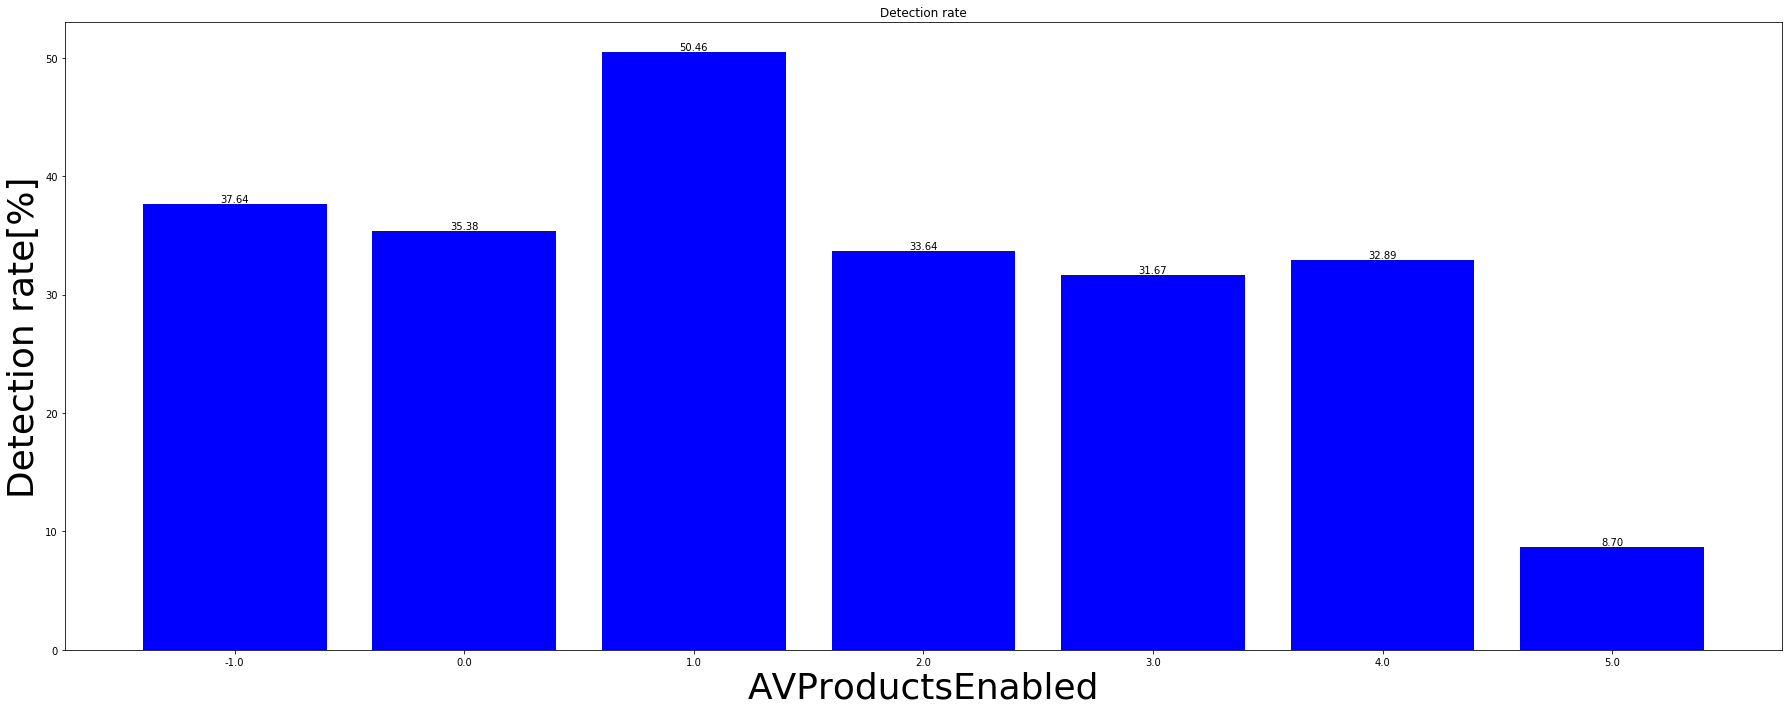

In [89]:
label_name = np.unique(pd_train_anti[col_name_Anti_related[1]])
plot_detection_rate(pd_train_anti, col_name_Anti_related[1], flag_rename_x_label=True)

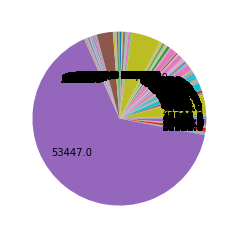

In [90]:
#'AVProductStatesIdentifier',
plot_data_as_pie_chart(pd_train_anti, col_name_Anti_related[2])

In [ ]:
status = pd_train_anti[col_name_Anti_related[2]].unique()

In [ ]:
label_name = np.unique(pd_train_anti[col_name_Anti_related[2]])
plot_detection_rate(pd_train_anti, col_name_Anti_related[2], flag_rename_x_label=True)

In [ ]:
#'IsProtected',
plot_data_as_pie_chart(pd_train_anti, col_name_Anti_related[3])

In [ ]:
label_name = np.unique(pd_train_anti[col_name_Anti_related[3]])
plot_detection_rate(pd_train_anti, col_name_Anti_related[3], flag_rename_x_label=True)

In [ ]:
#Census_ActivationChannel
col_name_activation_related = [
    'Census_ActivationChannel',
    'HasDetections',
]

In [ ]:
pd_train_activation = pd_train[col_name_activation_related].replace(np.nan, -1)

In [ ]:
plot_data_as_pie_chart(pd_train_activation, 'Census_ActivationChannel')

In [ ]:
label_name = np.unique(pd_train_activation['Census_ActivationChannel'])
plot_detection_rate(pd_train_activation, 'Census_ActivationChannel', flag_rename_x_label=True)

In [ ]:
print(label_name)

###### 問題3
コーディング
単一モデルで学習して推定を行ってください。また、交差検証、グリッドサーチも行うこと。
ここで1つSubmitを行ってください。（現在開催中のコンペであり、1日の提出回数に制限があることに注意してください。）

In [ ]:
#SVMで予測を行う。
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma='auto', probability=True)

#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": True,
          "cv_split": 3,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_off" : True,
        }
param_grid = {
            "hyper_param":{
                "tol ": [1e-3, 5e-3],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

In [ ]:
#特徴量を選ぶ
feature_value = col_name_os_related[0:len(col_name_os_related)-1]
print(feature_value)

In [ ]:
#データが多いのでサンプル数を減らす
pd_train_half = pd_train.sample(frac=0.01)

In [ ]:
(pd_train_half['HasDetections'] == 1).value_counts()

In [ ]:
#オブジェクト型を数値に置き換え
train_OS_related = pd_train_half[col_name_os_related]

object_data = train_OS_related.select_dtypes(['object'])
object_col_name = object_data.columns.values
#object_col_name = pd_train[col_name_os_related].columns.values
for i in range(0,len(object_col_name)):
    labels, uniques = pd.factorize(train_OS_related[object_col_name[i]])
    train_OS_related[object_col_name[i]] = labels    

train_OS_related = train_OS_related.replace(np.nan, -1)

In [ ]:
pipeline2(model, train_OS_related, "HasDetections", feature_value, pos_label=1, params=params_ext, params_grid=param_grid)

###### 問題4
2種類のアンサンブル学習の効果を確認しましょう。  
バギング  
単一のモデルはLGBMやXGBなどのアンサンブルモデルではなく、SVMやロジスティック回帰、決定木などのシンプルなモデルにしてください。  
説明  
バギングにはSoft VotingとHard Votingがあります。それぞれについて説明してください。  
バギングする際に選ぶモデルはどういった組み合わせにすると良いか考察してください。今後アンサンブル学習を利用していく上で非常に重要な点です。  
コーディング  
scikit-learnを用いて、バギング（Soft Voting）を実装してください。各単一モデル（弱学習器）はなるべく異なるモデルにしましょう。
sklearn.ensemble.VotingClassifier — scikit-learn 0.20.2 documentation

###### Soft VotingとHard Votingについて
Soft Voting : 各弱識別器の中で最も高い確率を採用する  
Hard Voting : 各弱識別器の結果の多数決によって答えを決める

###### バギングする際に選ぶモデルはどういった組み合わせにすると良いか?  
全く異なるロジックのモデルを選ぶとよい。モデルに多様性を持たせるため。

###### ブースティング    バギングとの違いについて説明してください。  
ブースティング：弱学習器を直列につないで学習をさせたもの。弱学習器への入力は直前の学習結果となる。直前の学習で間違えてデータにより注目して学習を行う。これを繰り返すことで精度を向上できる。（フィードバックが働く）  
バギング：弱学習器を並列につないだもの。それぞれの弱学習器の結果の多数決(ハードバギング)または確率の高いもの（ソフトバギング）を結果として採用する。

###### コーディング（バギング　 SVM+ロジスティック）

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf2 = SVC(kernel='rbf', gamma='auto', probability=True)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
#eclf1 = eclf1.fit(X, y)
#print(eclf1.predict(X))

In [ ]:
#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": True,
          "cv_split": 3,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_off" : False,
        }
param_grid = {
            "hyper_param":{
                "tol ": [1e-3, 5e-3],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

In [ ]:
pipeline2(eclf1, train_OS_related, "HasDetections", feature_value, pos_label=1, params=params_ext, params_grid=param_grid)

###### コーディング（ブースティング   LGBMを使う）

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='regression',
                        num_leaves = 15,
                        learning_rate=0.1,
                        min_child_samples=10,
                        n_estimators=100)

In [ ]:
#pipelineパラメーター
params_ext = {
         "normalization_on": True,
          "roc_plot_on": False,
          "cv_on": True,
          "cv_split": 3,
          "cv_random_state" : None,
          "cv_shuffle" : True,
          "grid_search_off" : True,
        }
param_grid = {
            "hyper_param":{
                "tol ": [1e-3, 5e-3],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

In [ ]:
pipeline2(lgbm, train_OS_related, "HasDetections", feature_value, pos_label=1, params=params_ext, params_grid=param_grid)

##### 結果
SVM単体 : AUC=0.543  
バギング（SVM+ロジスティック） : AUC=0.542  
ブースティング（LightGBM） : AUC=0.549  
結果、ブースティング(LightGBM)が一番良い結果であった。この解析ではSVM単体とバギングの差はなかった。

###### 問題5
1日目の終会でどのようなEDAをしたかプロジェクターで発表してもらいます。

1. OSのバージョンアップに対して感染率に相関はない。OSによる改善は無し=>OS以外の要因である。  
2. MSDFのProバージョンはHomeバージョンよりも高い機能を持っているが感染率はProの方が高かった。=>どんな対策ソフトを入れていても感染するときは感染する。ユーザーの使い方次第　　
3. SModeが有効な場合、感染率は低い => インストールできるアプリケーションをMS純正品に限定すると良い。

結論  
感染率の高さはユーザーの使い方に依るところが大きい。  
適切にユーザーの使い方を制限することが重要そうである。（危険度の高いサイトへのアクセス制限、インストールできるアプリの制限）  
実際に重要度解析でSmartScreenの重要度が非常に高かった。